In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [8]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

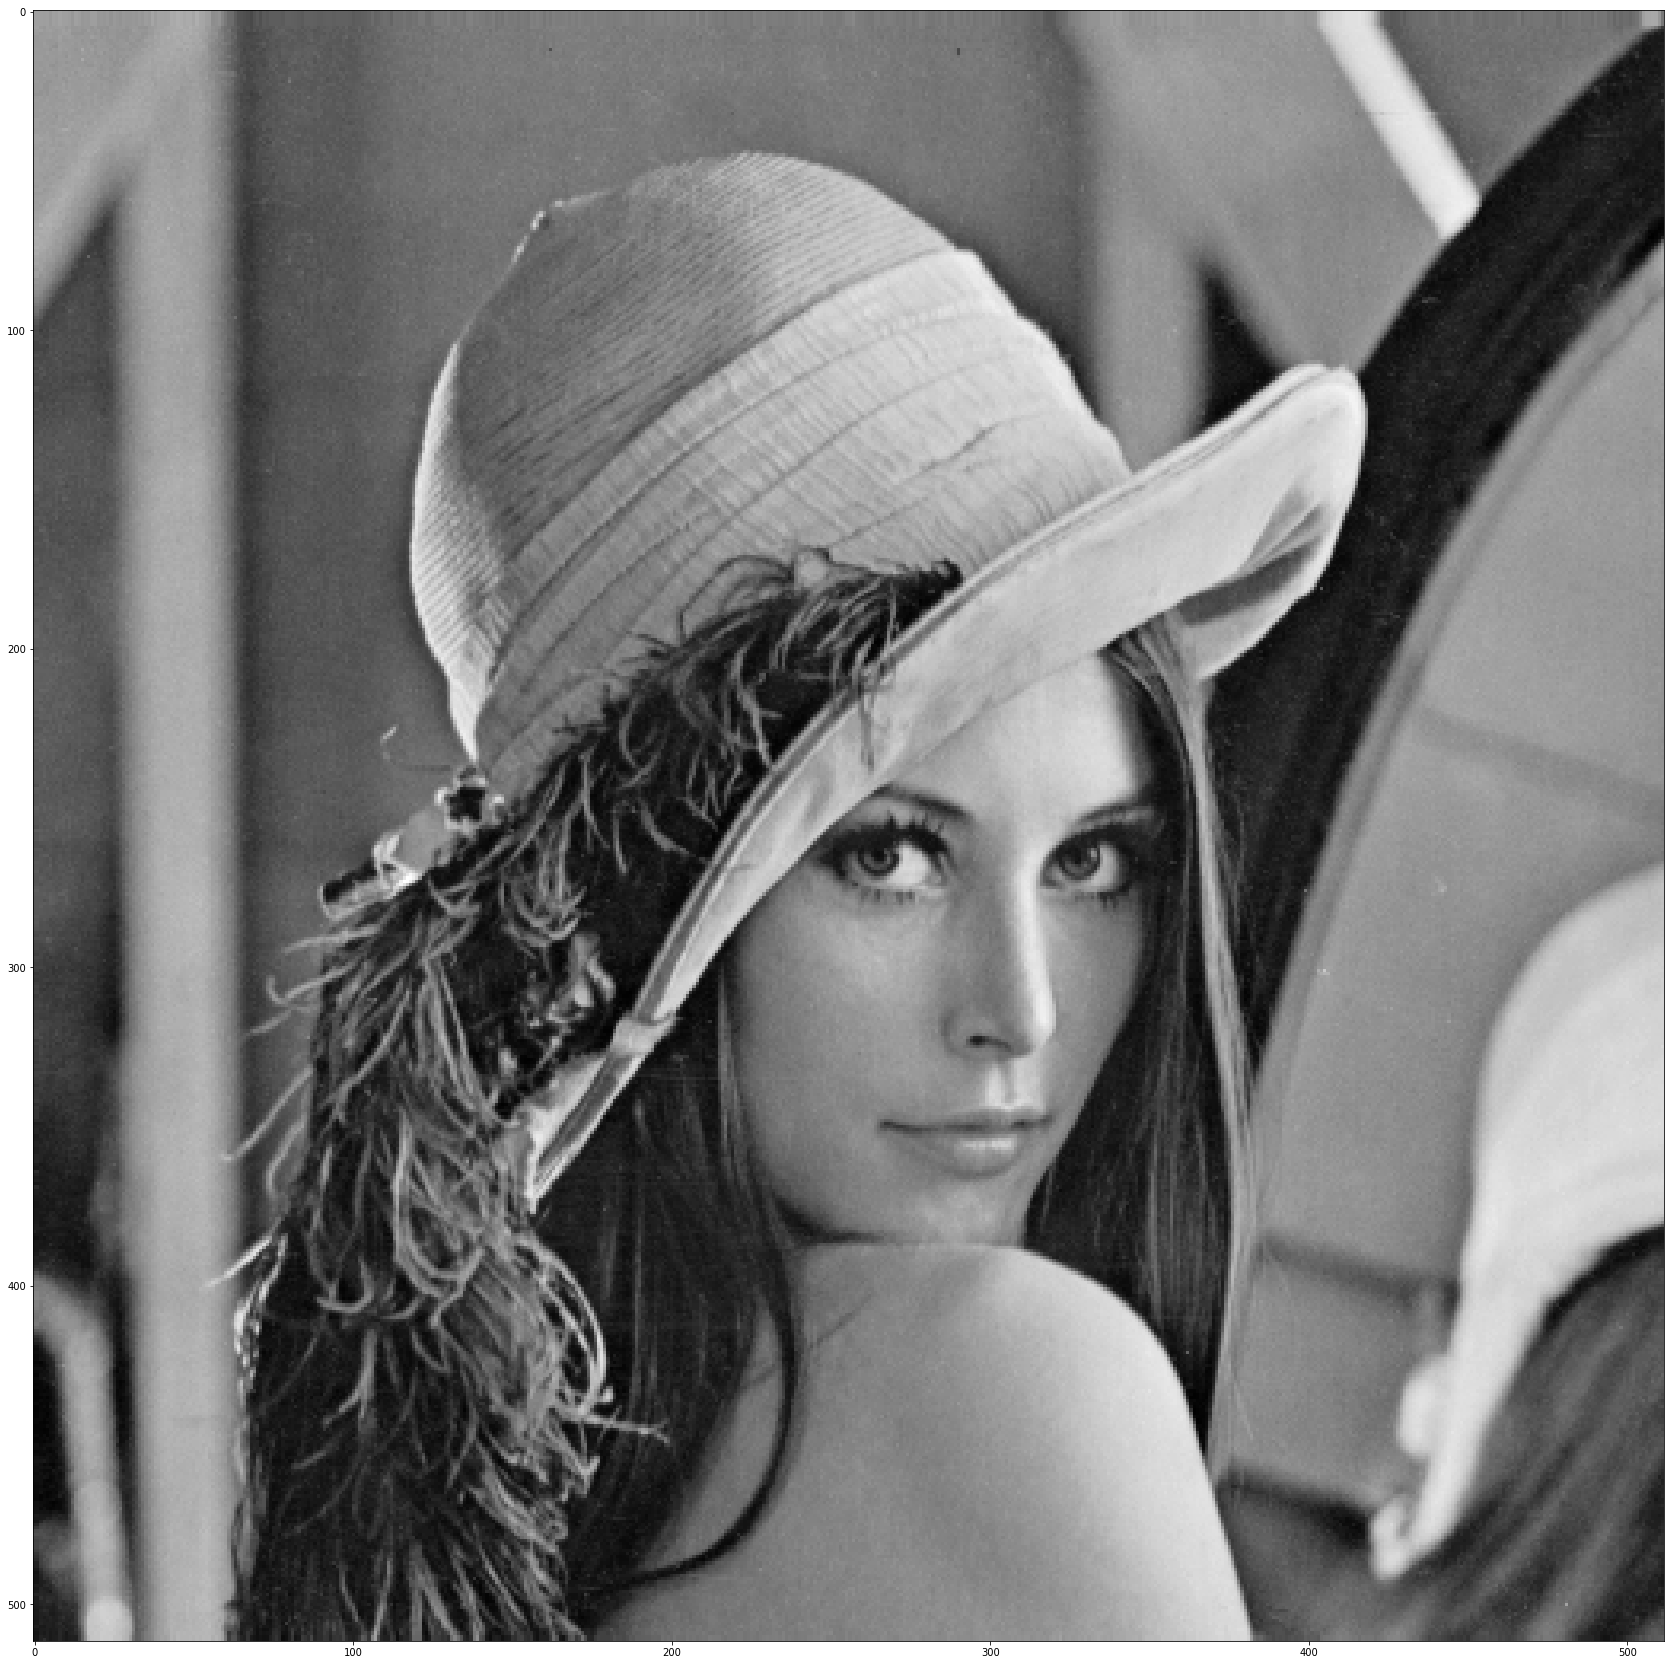

In [9]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

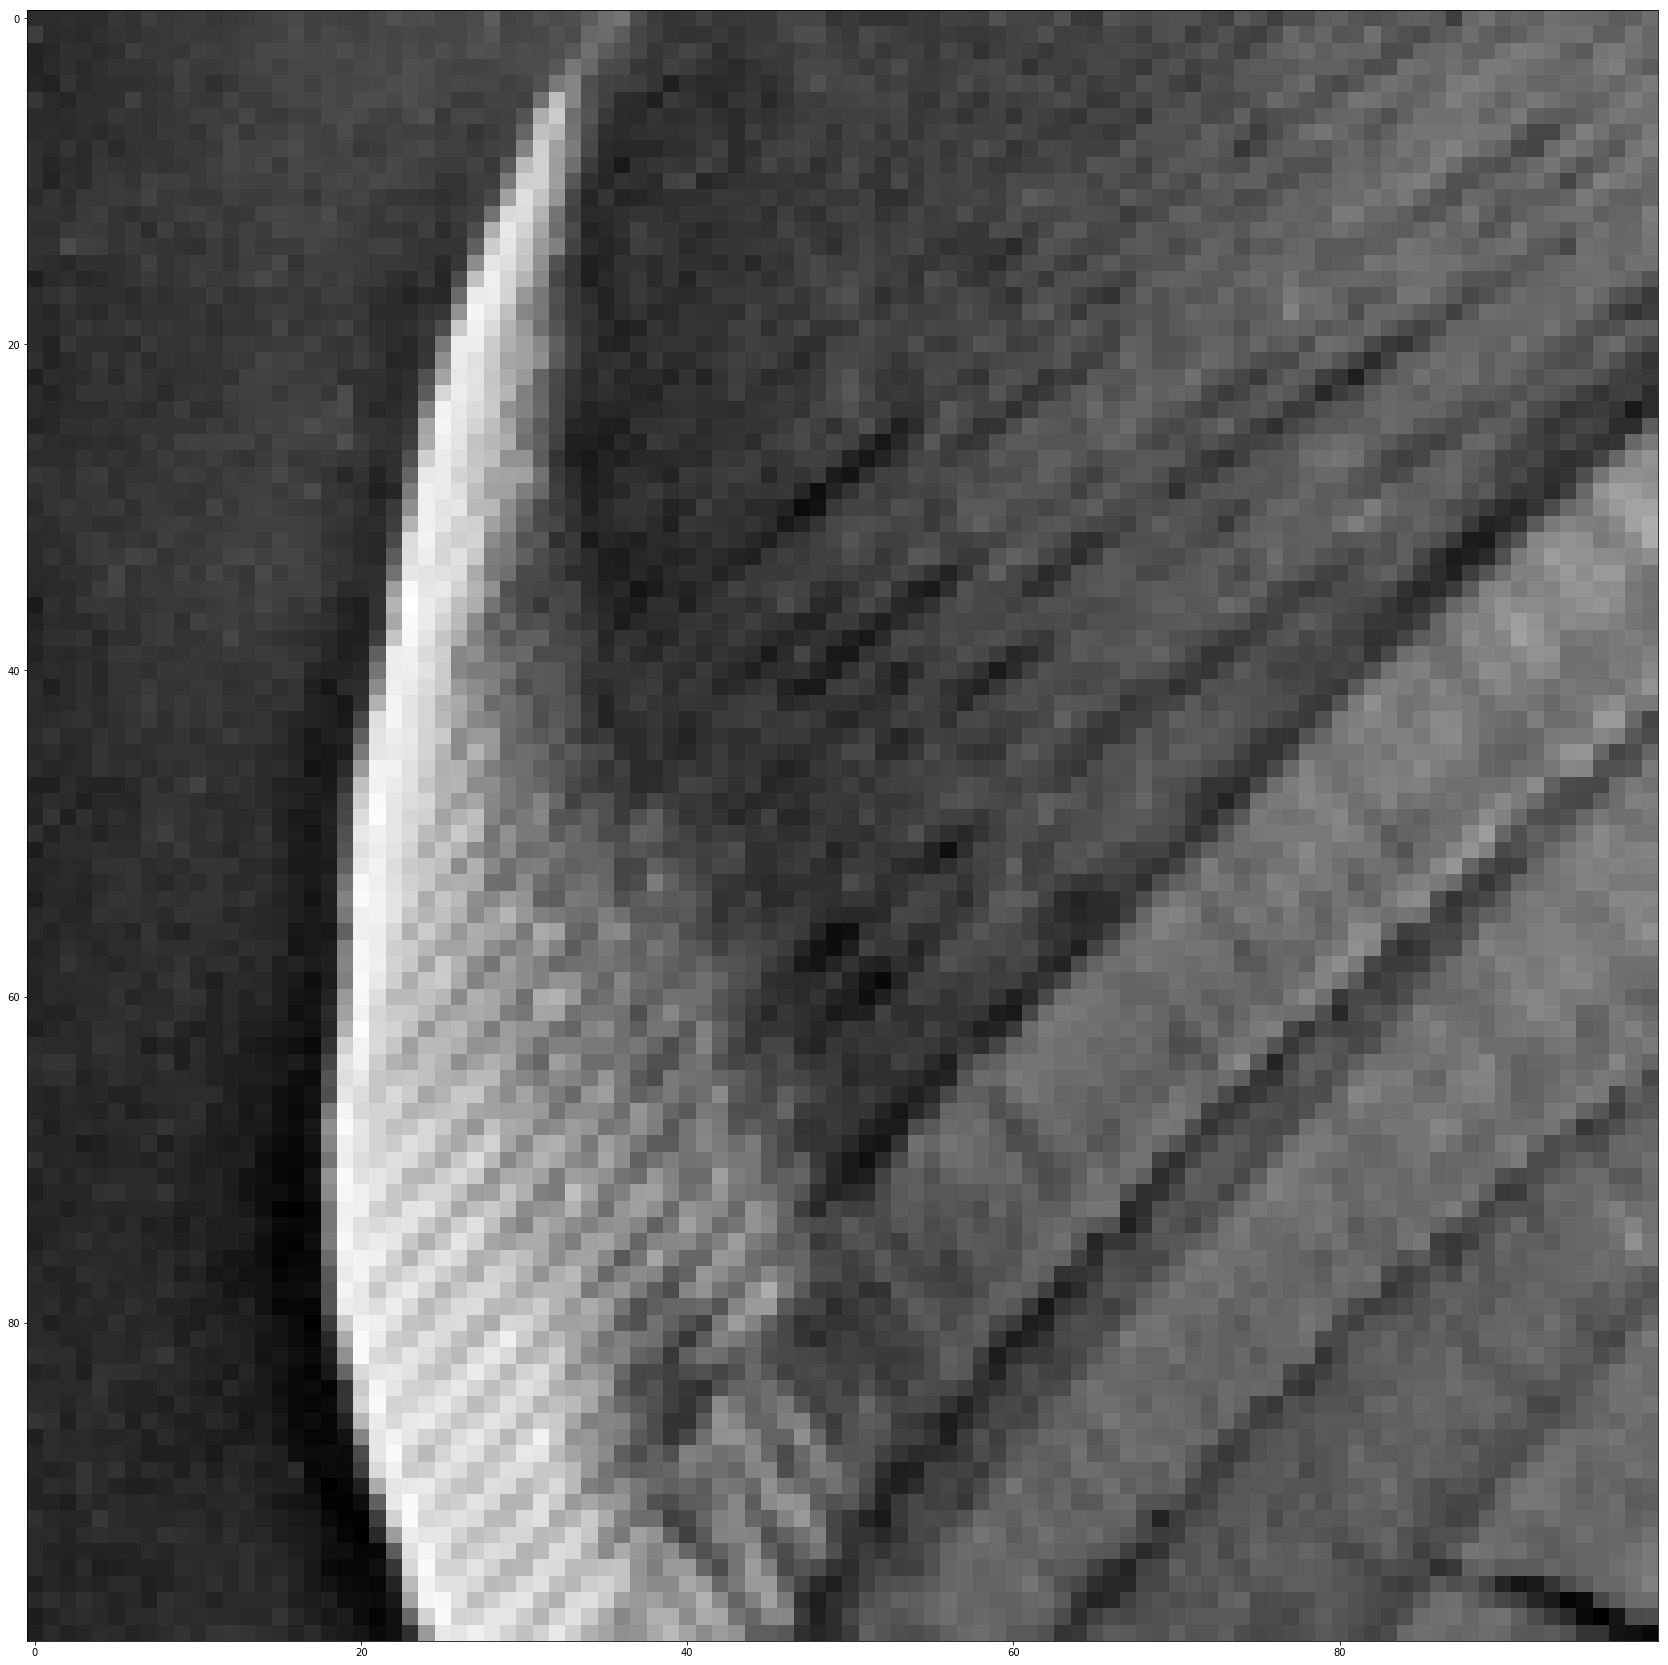

In [10]:
show(Y[100:200, 100:200])

In [33]:
# Calculamos la DWT de la imagen original
#wavelet = 'rbio1.1'
#wavelet = 'rbio3.5'
wavelet = 'db5'
#wavelet = 'db25'
#wavelet = 'rbio6.8'
L, H = pywt.dwt2(Y, wavelet, 'per')

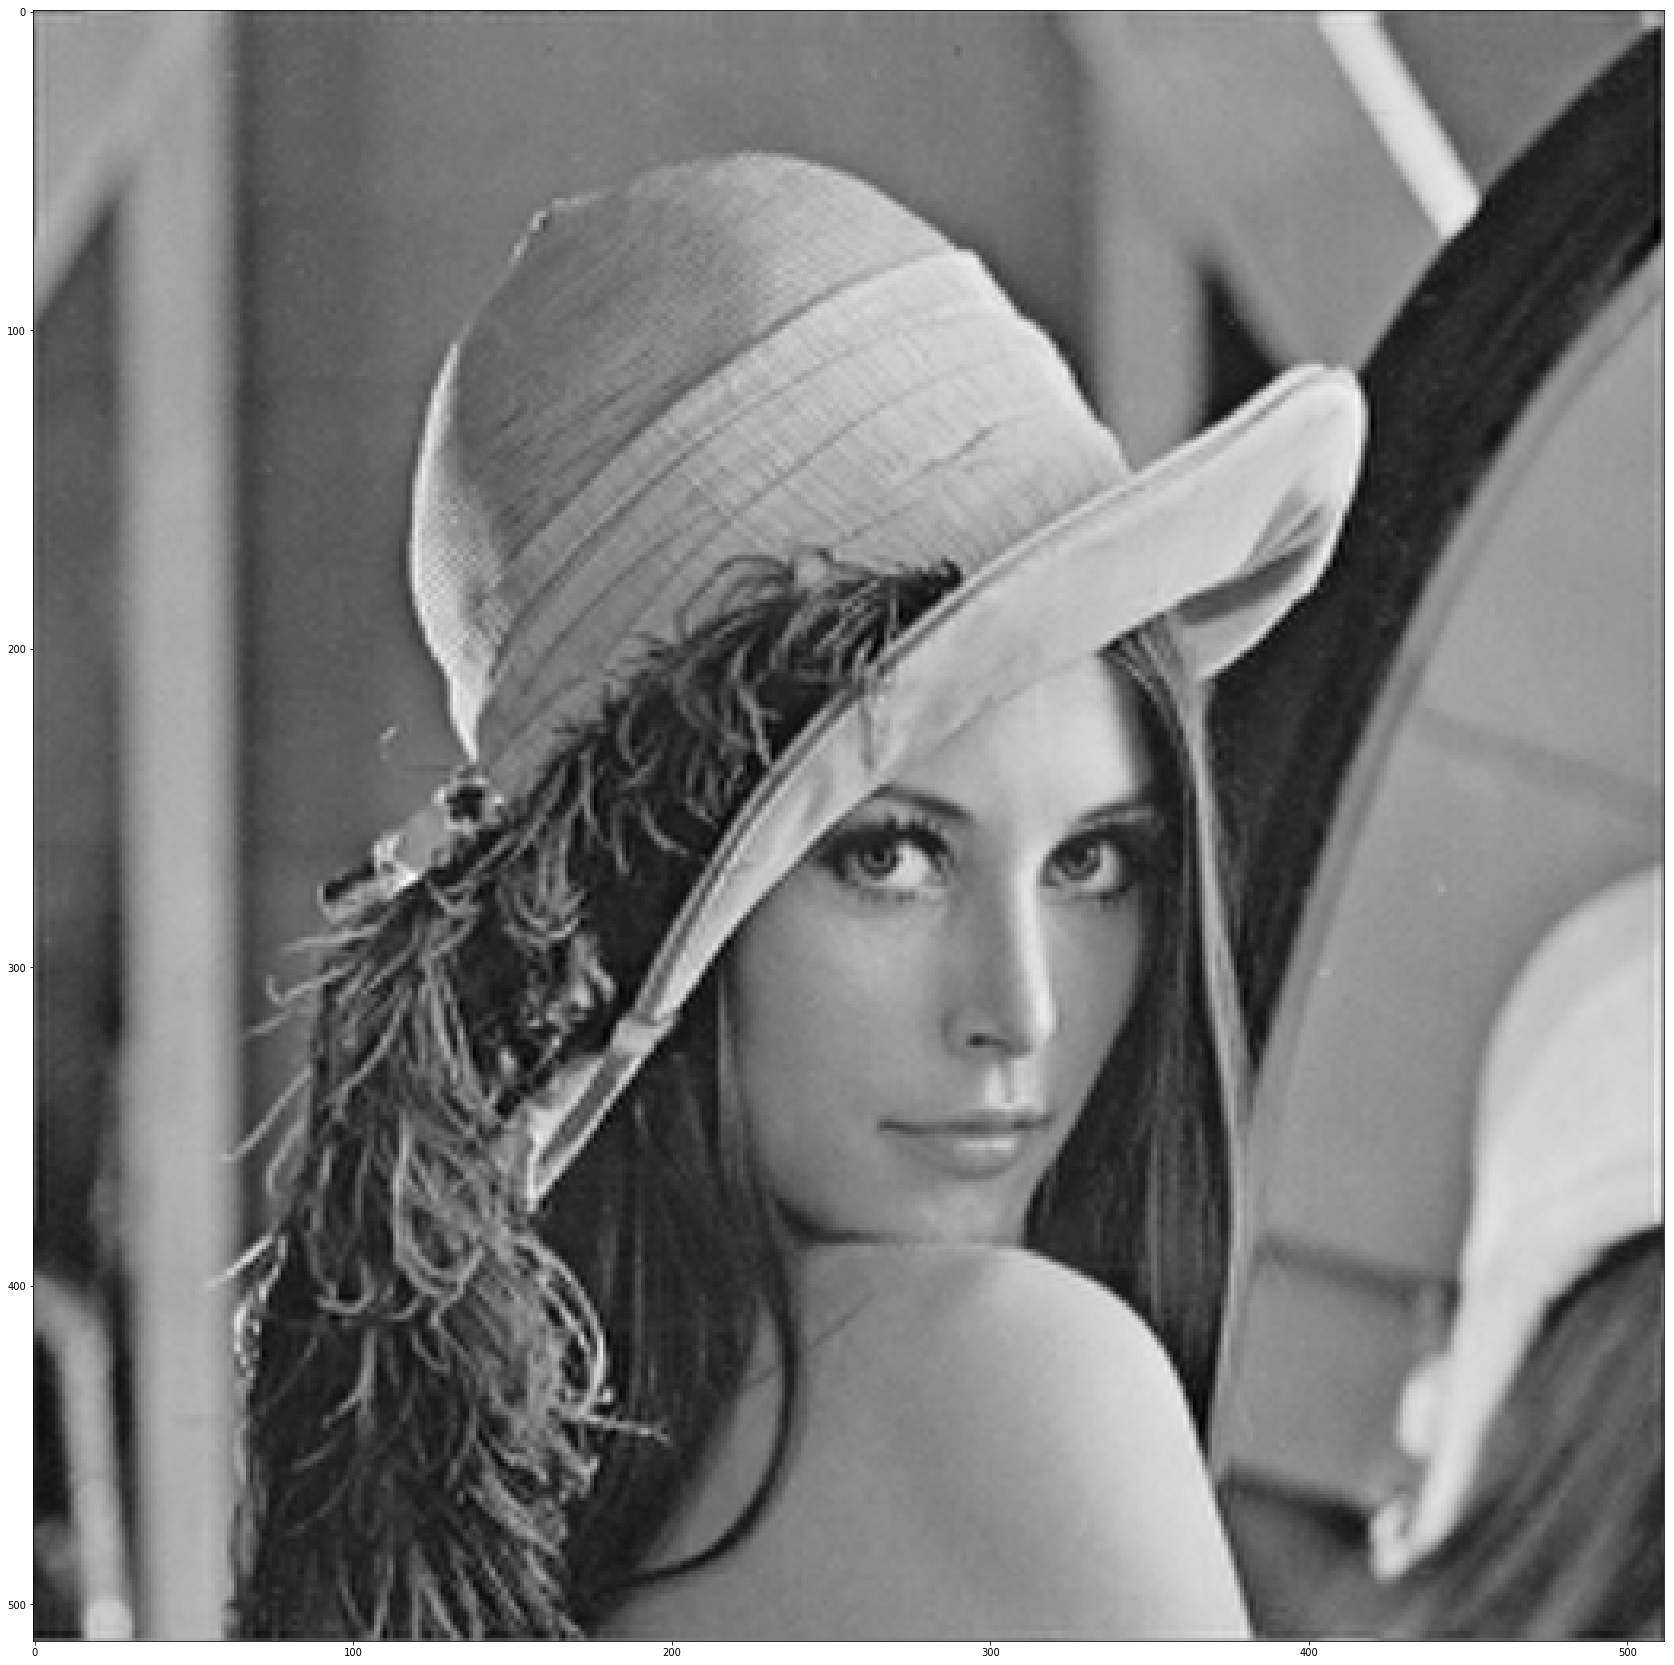

In [34]:
zero = np.zeros((L.shape[0], L.shape[1]))
L_big = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')
show(L_big)

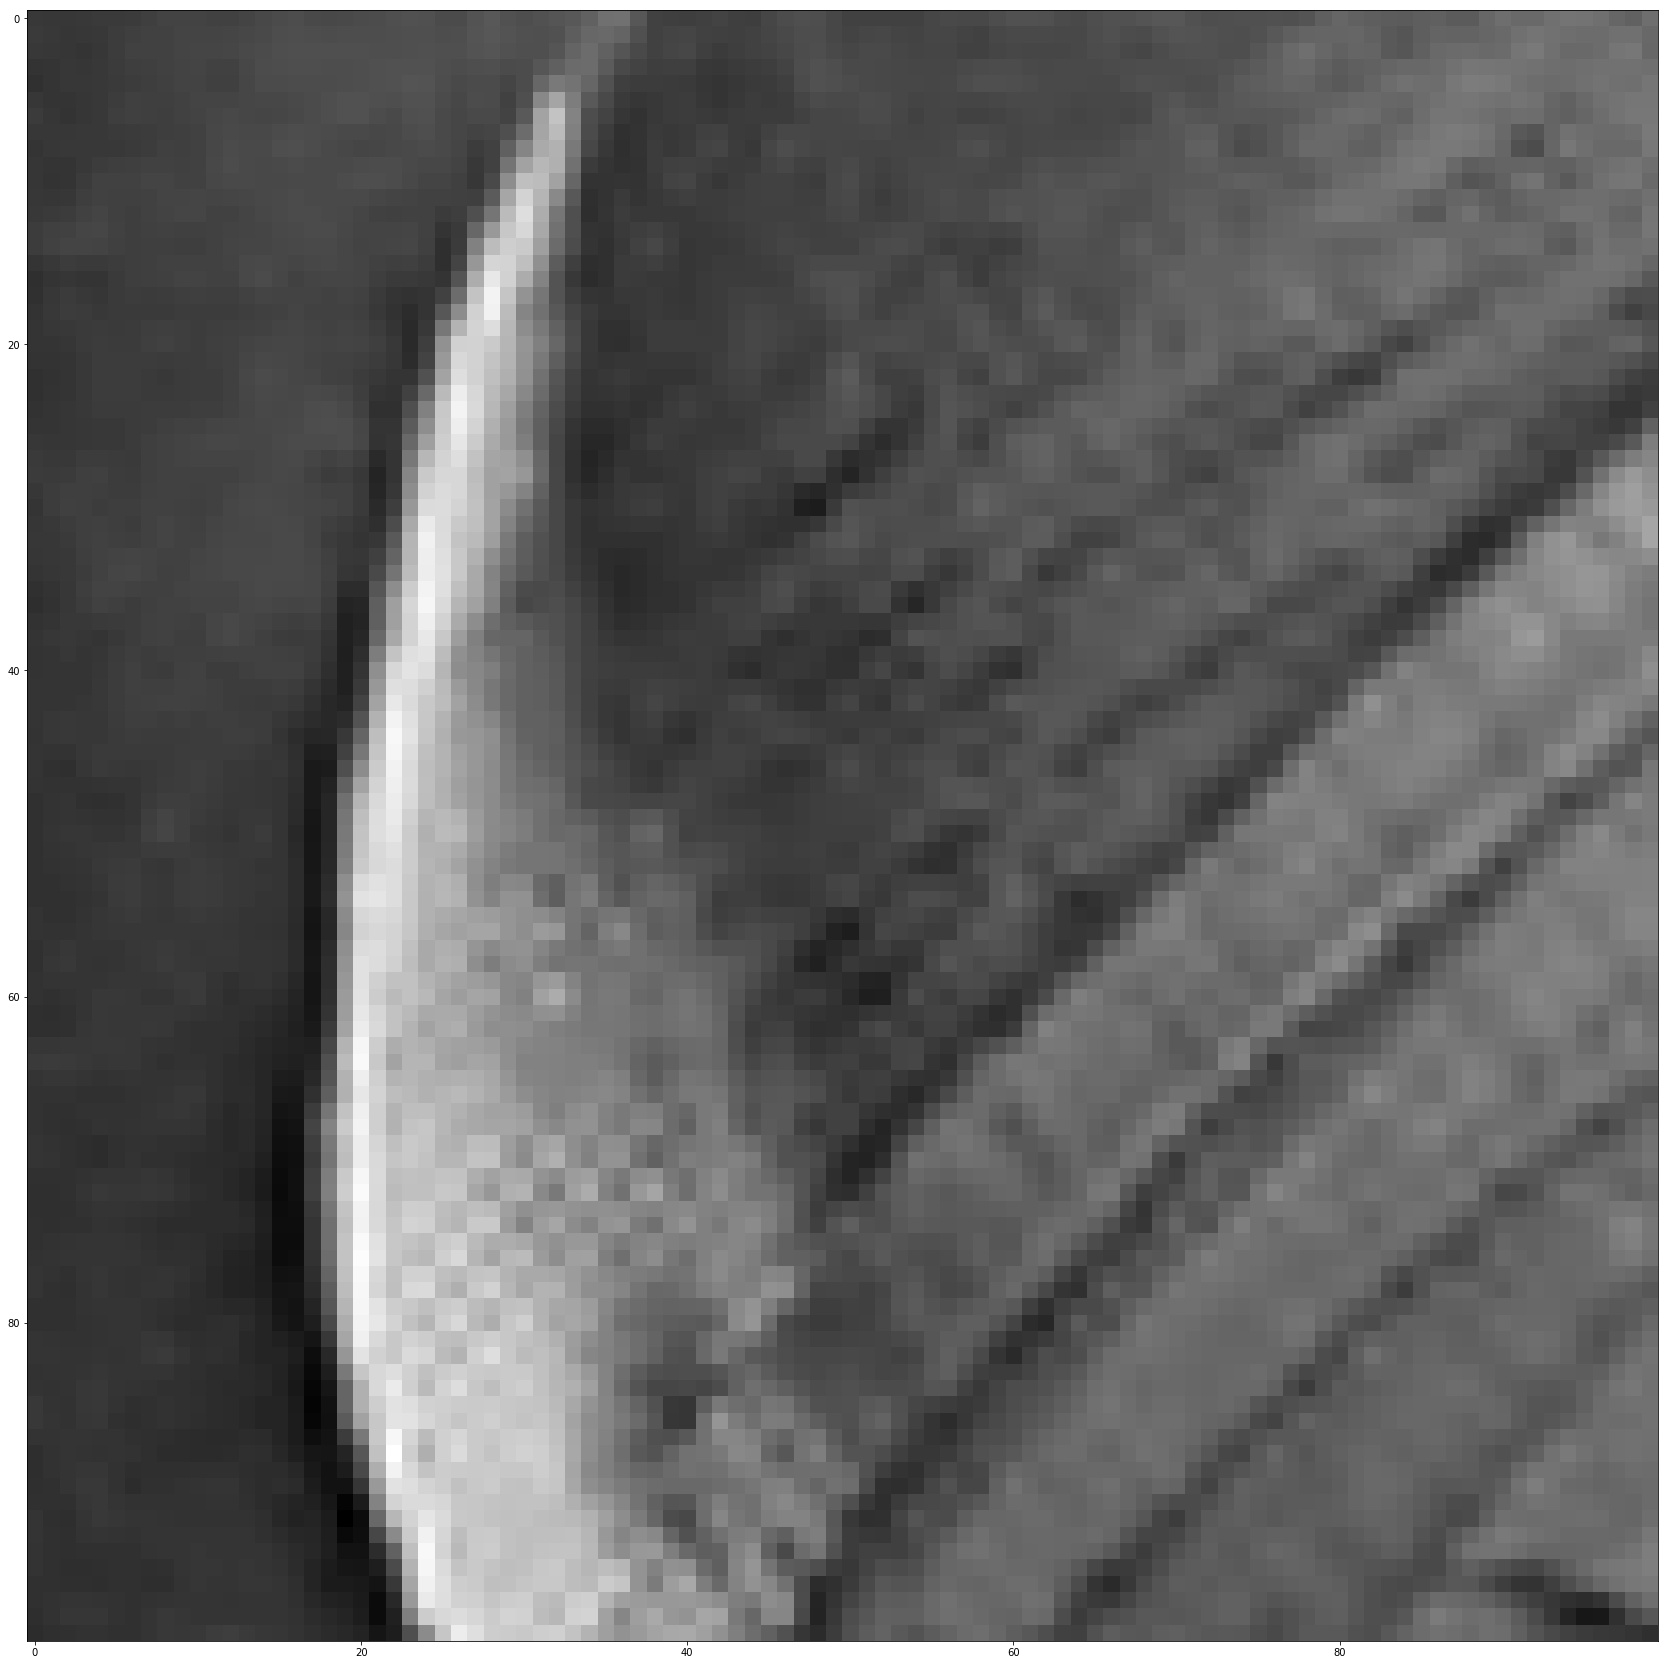

In [35]:
show(L_big[100:200, 100:200])

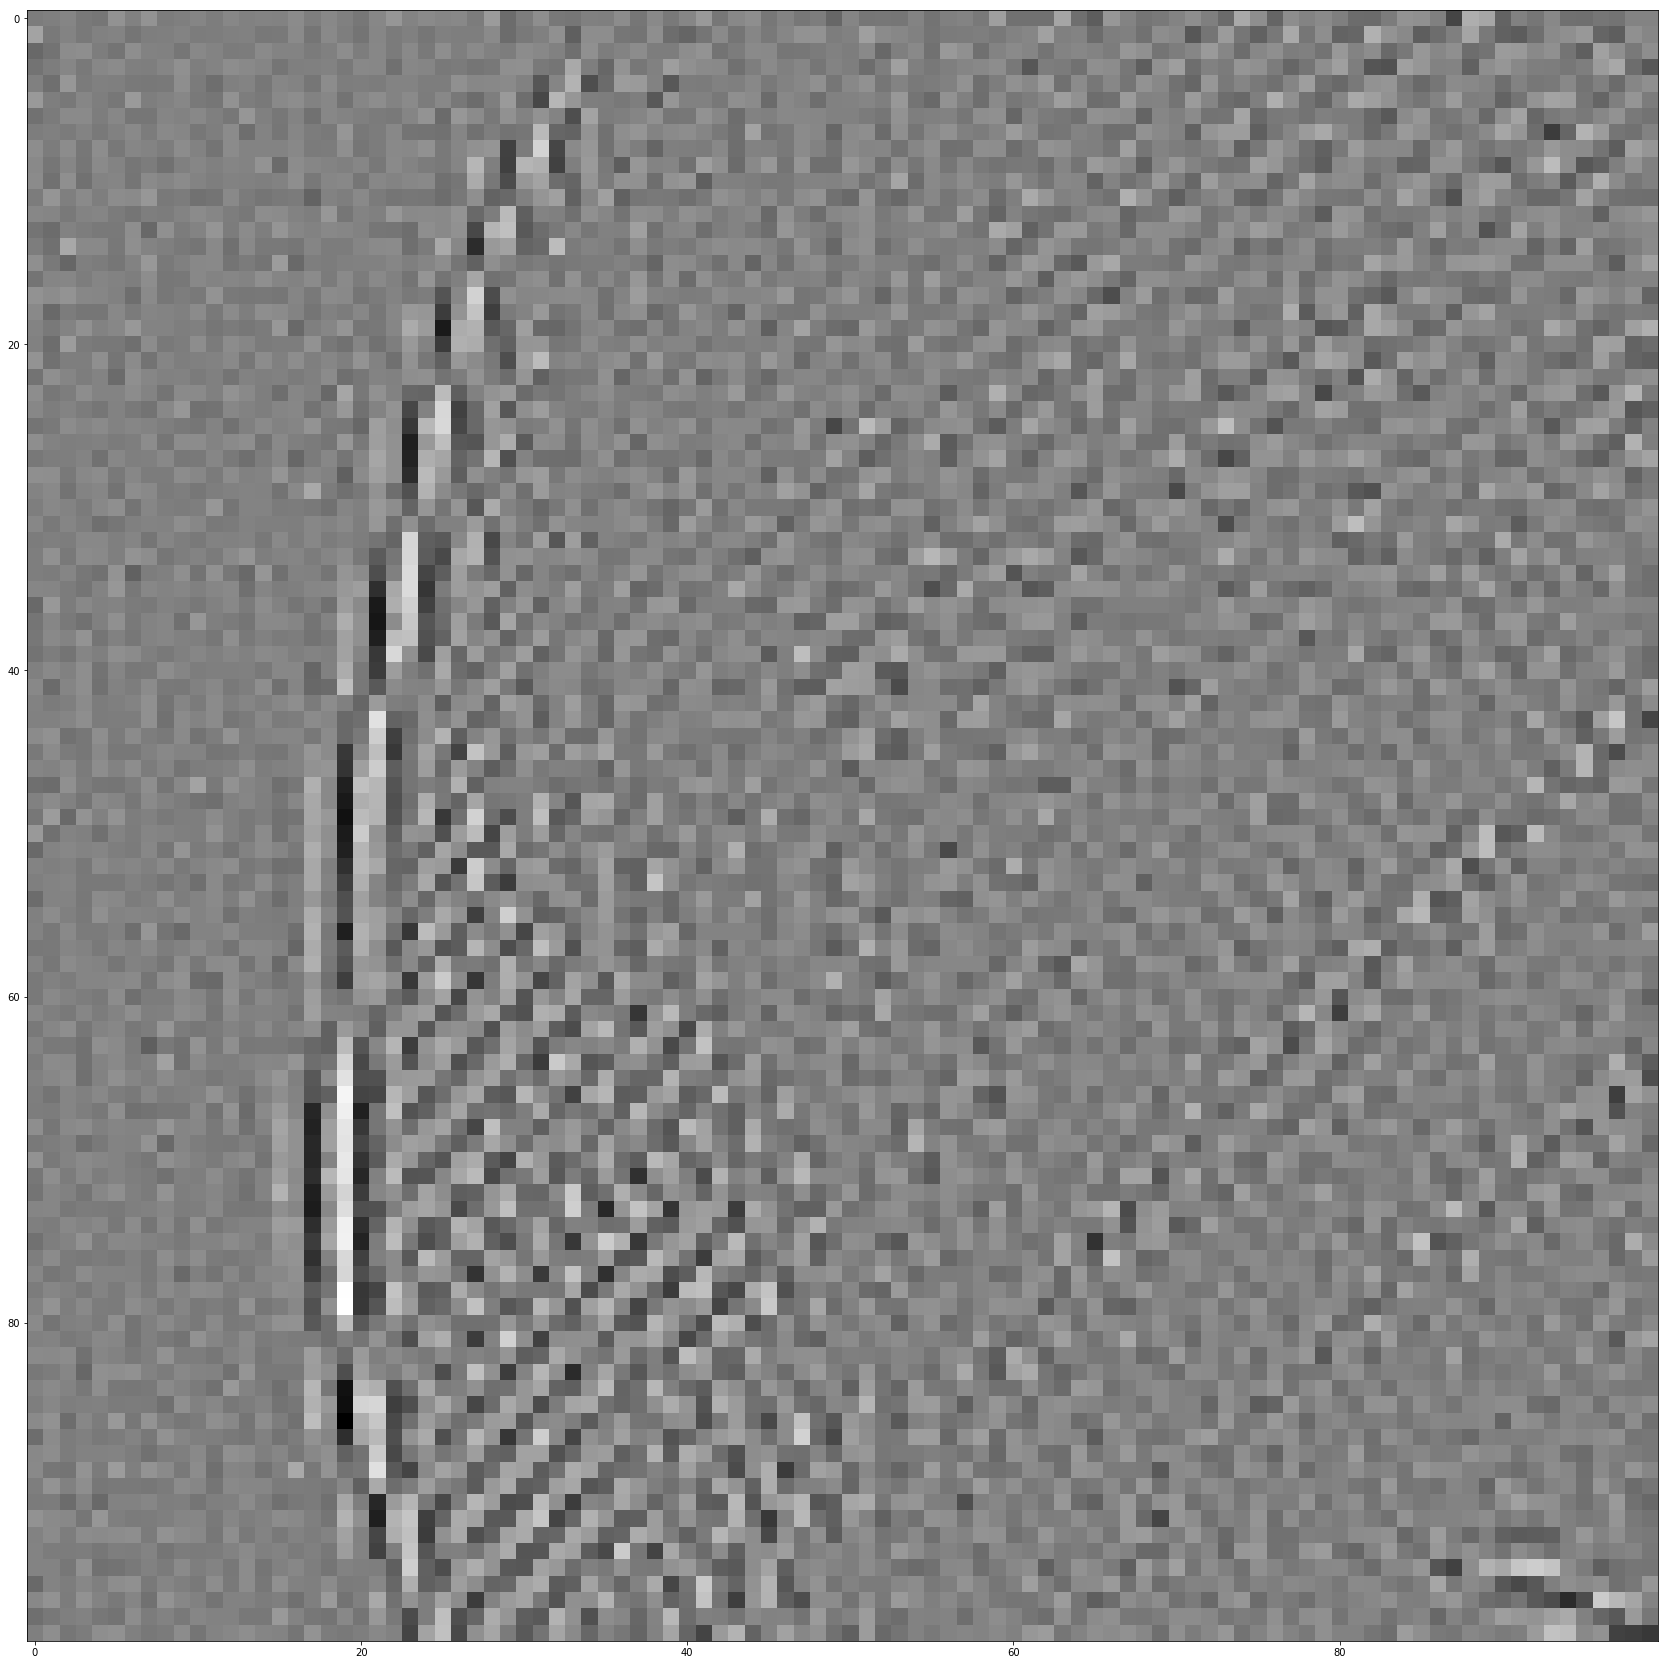

In [36]:
show(Y[100:200, 100:200]-L_big[100:200, 100:200])

/home/vruiz/.pyenv/versions/3.6.4/lib/python3.6/site-packages/medpy/filter/smoothing.py:142: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/home/vruiz/.pyenv/versions/3.6.4/lib/python3.6/site-packages/medpy/filter/smoothing.py:151: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


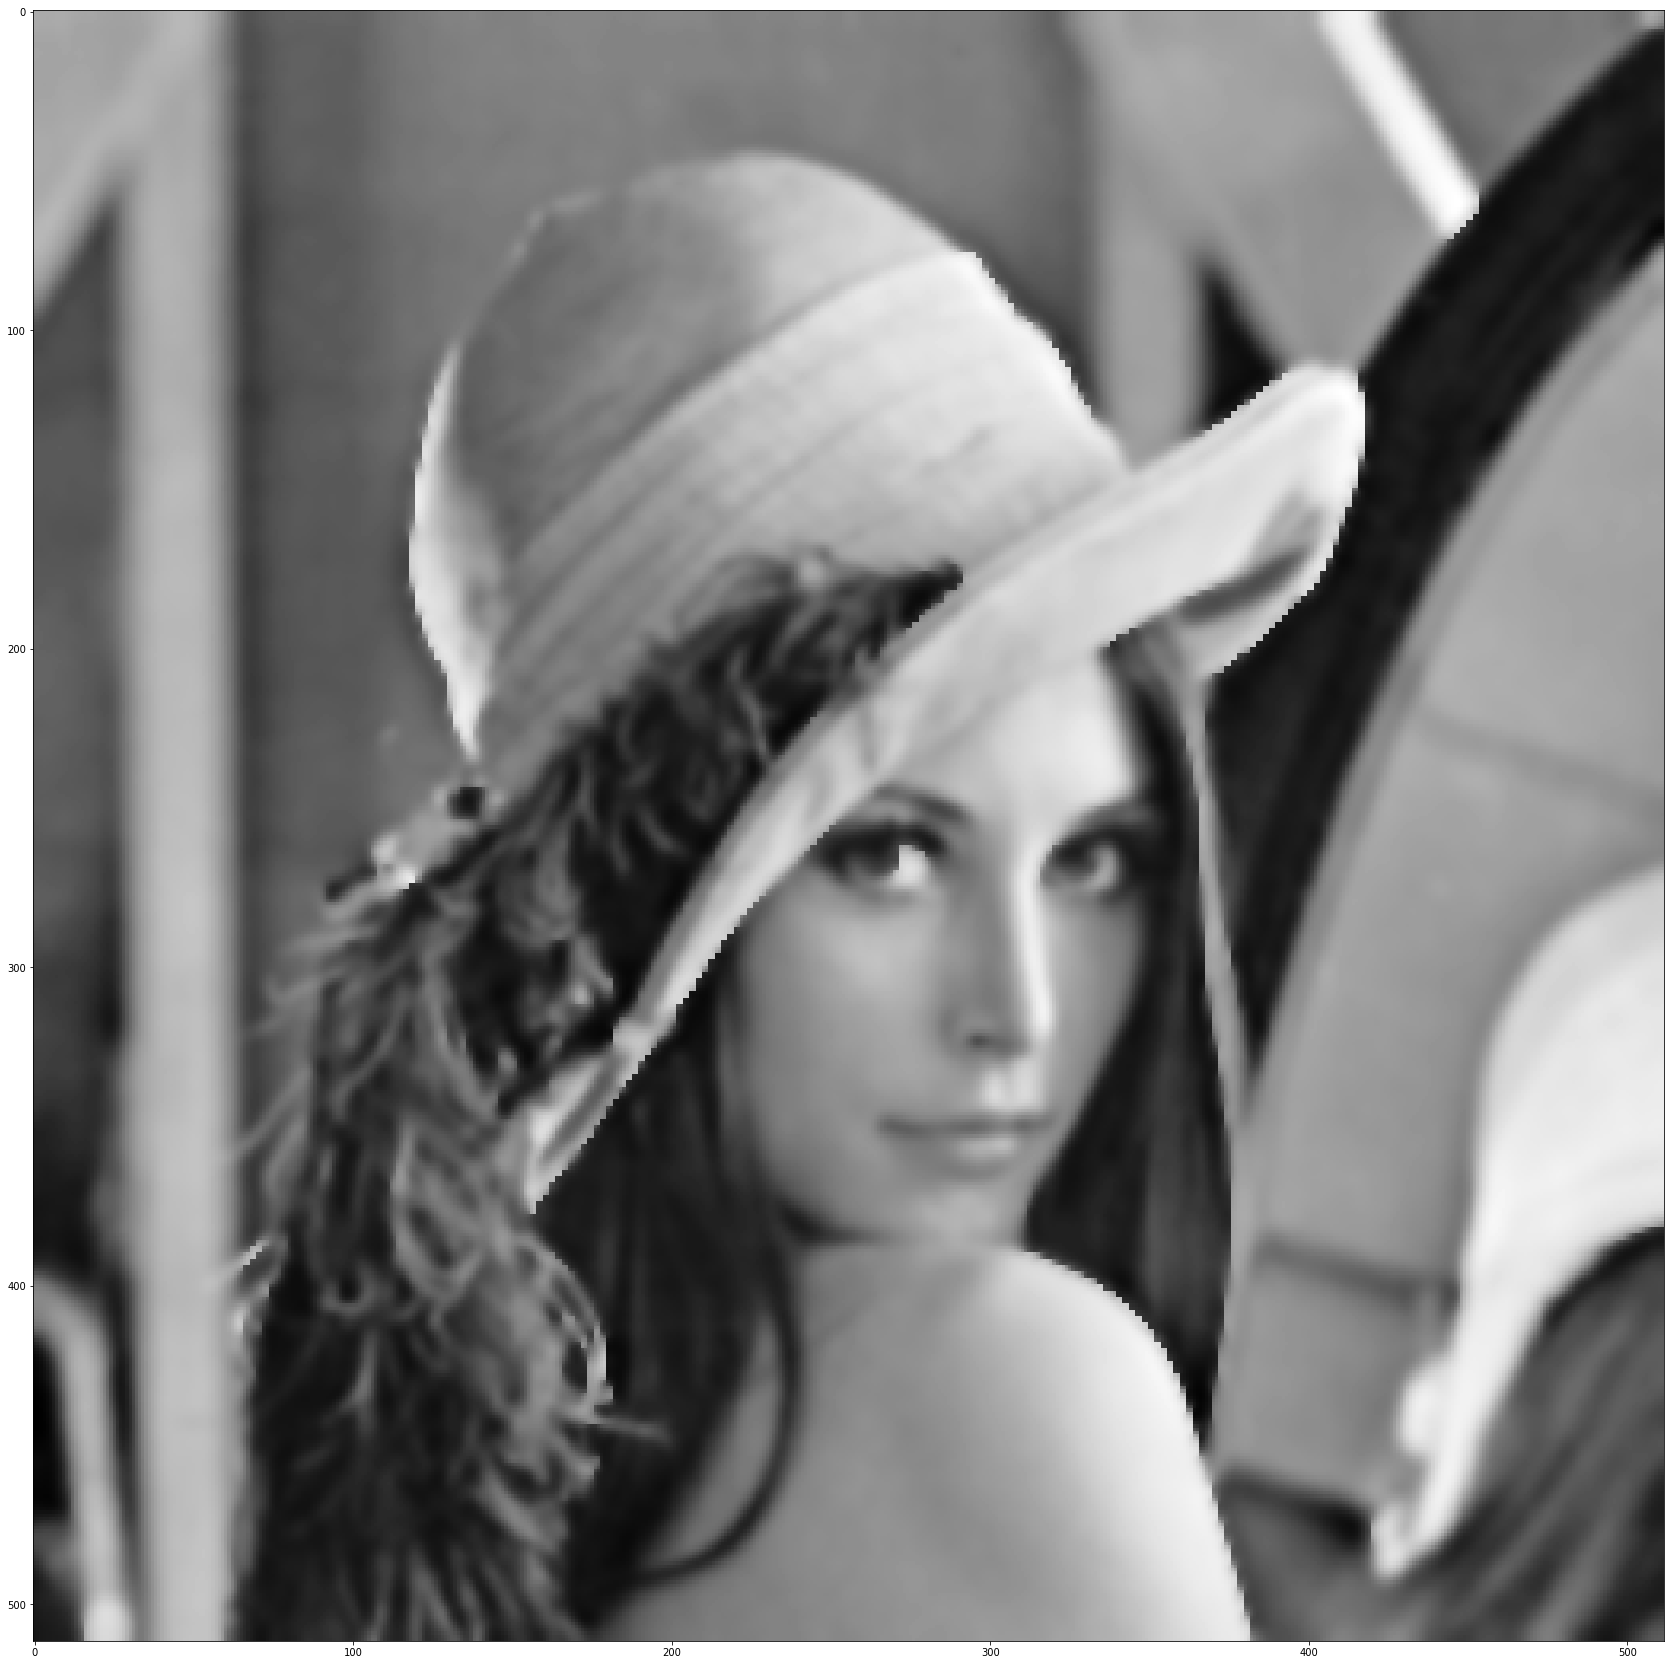

In [32]:
from medpy.filter.smoothing import anisotropic_diffusion
L_big_filtered = anisotropic_diffusion(L_big, niter=20)
show(L_big_filtered)

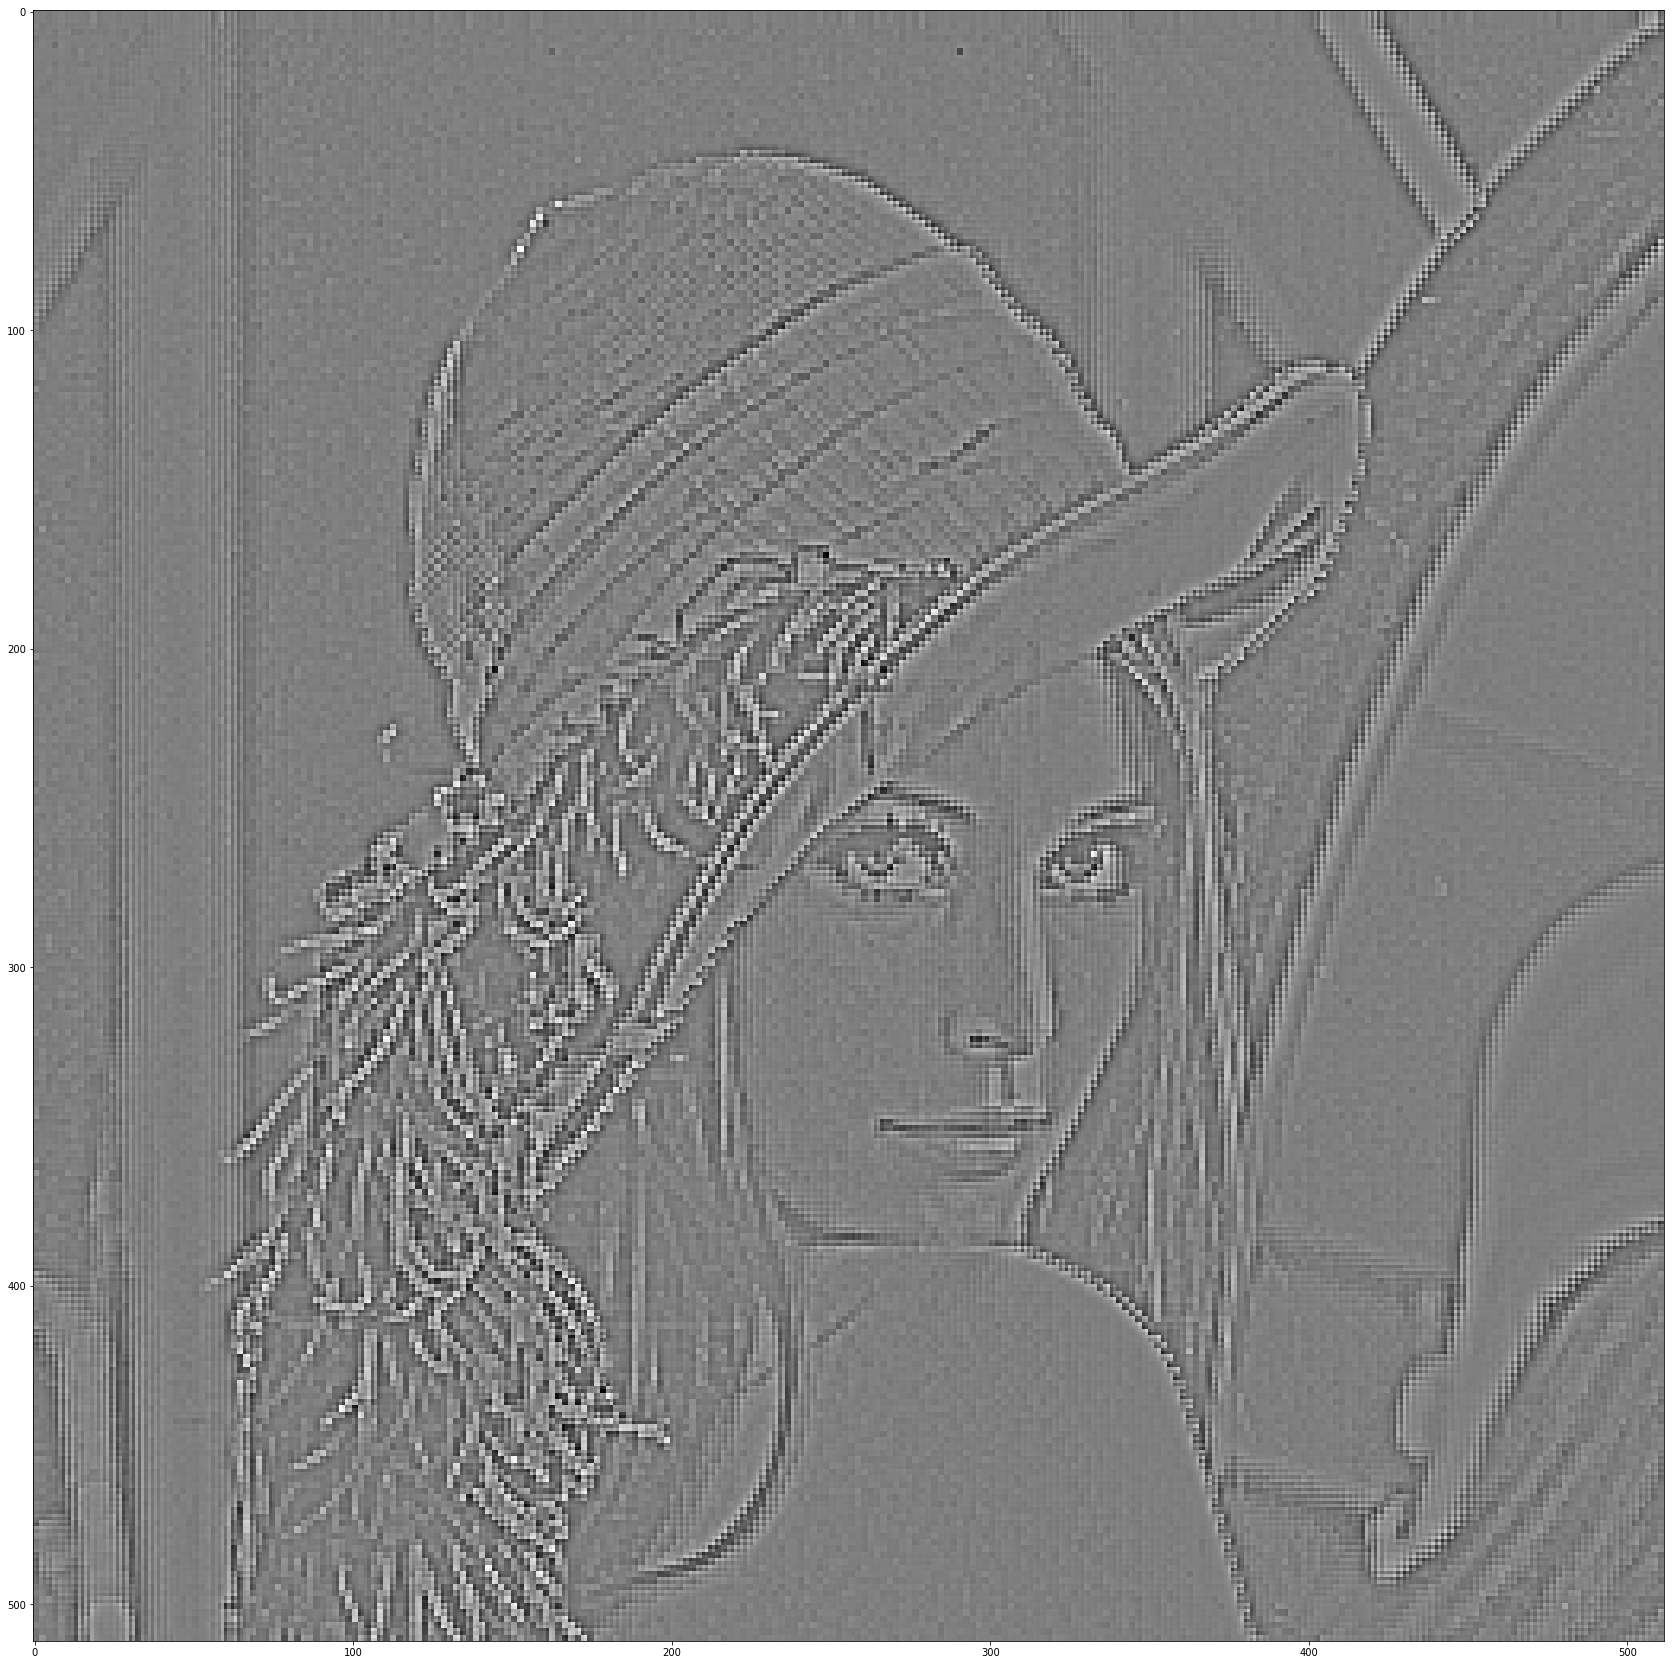

In [27]:
diff = L_big - L_big_filtered
show(diff)

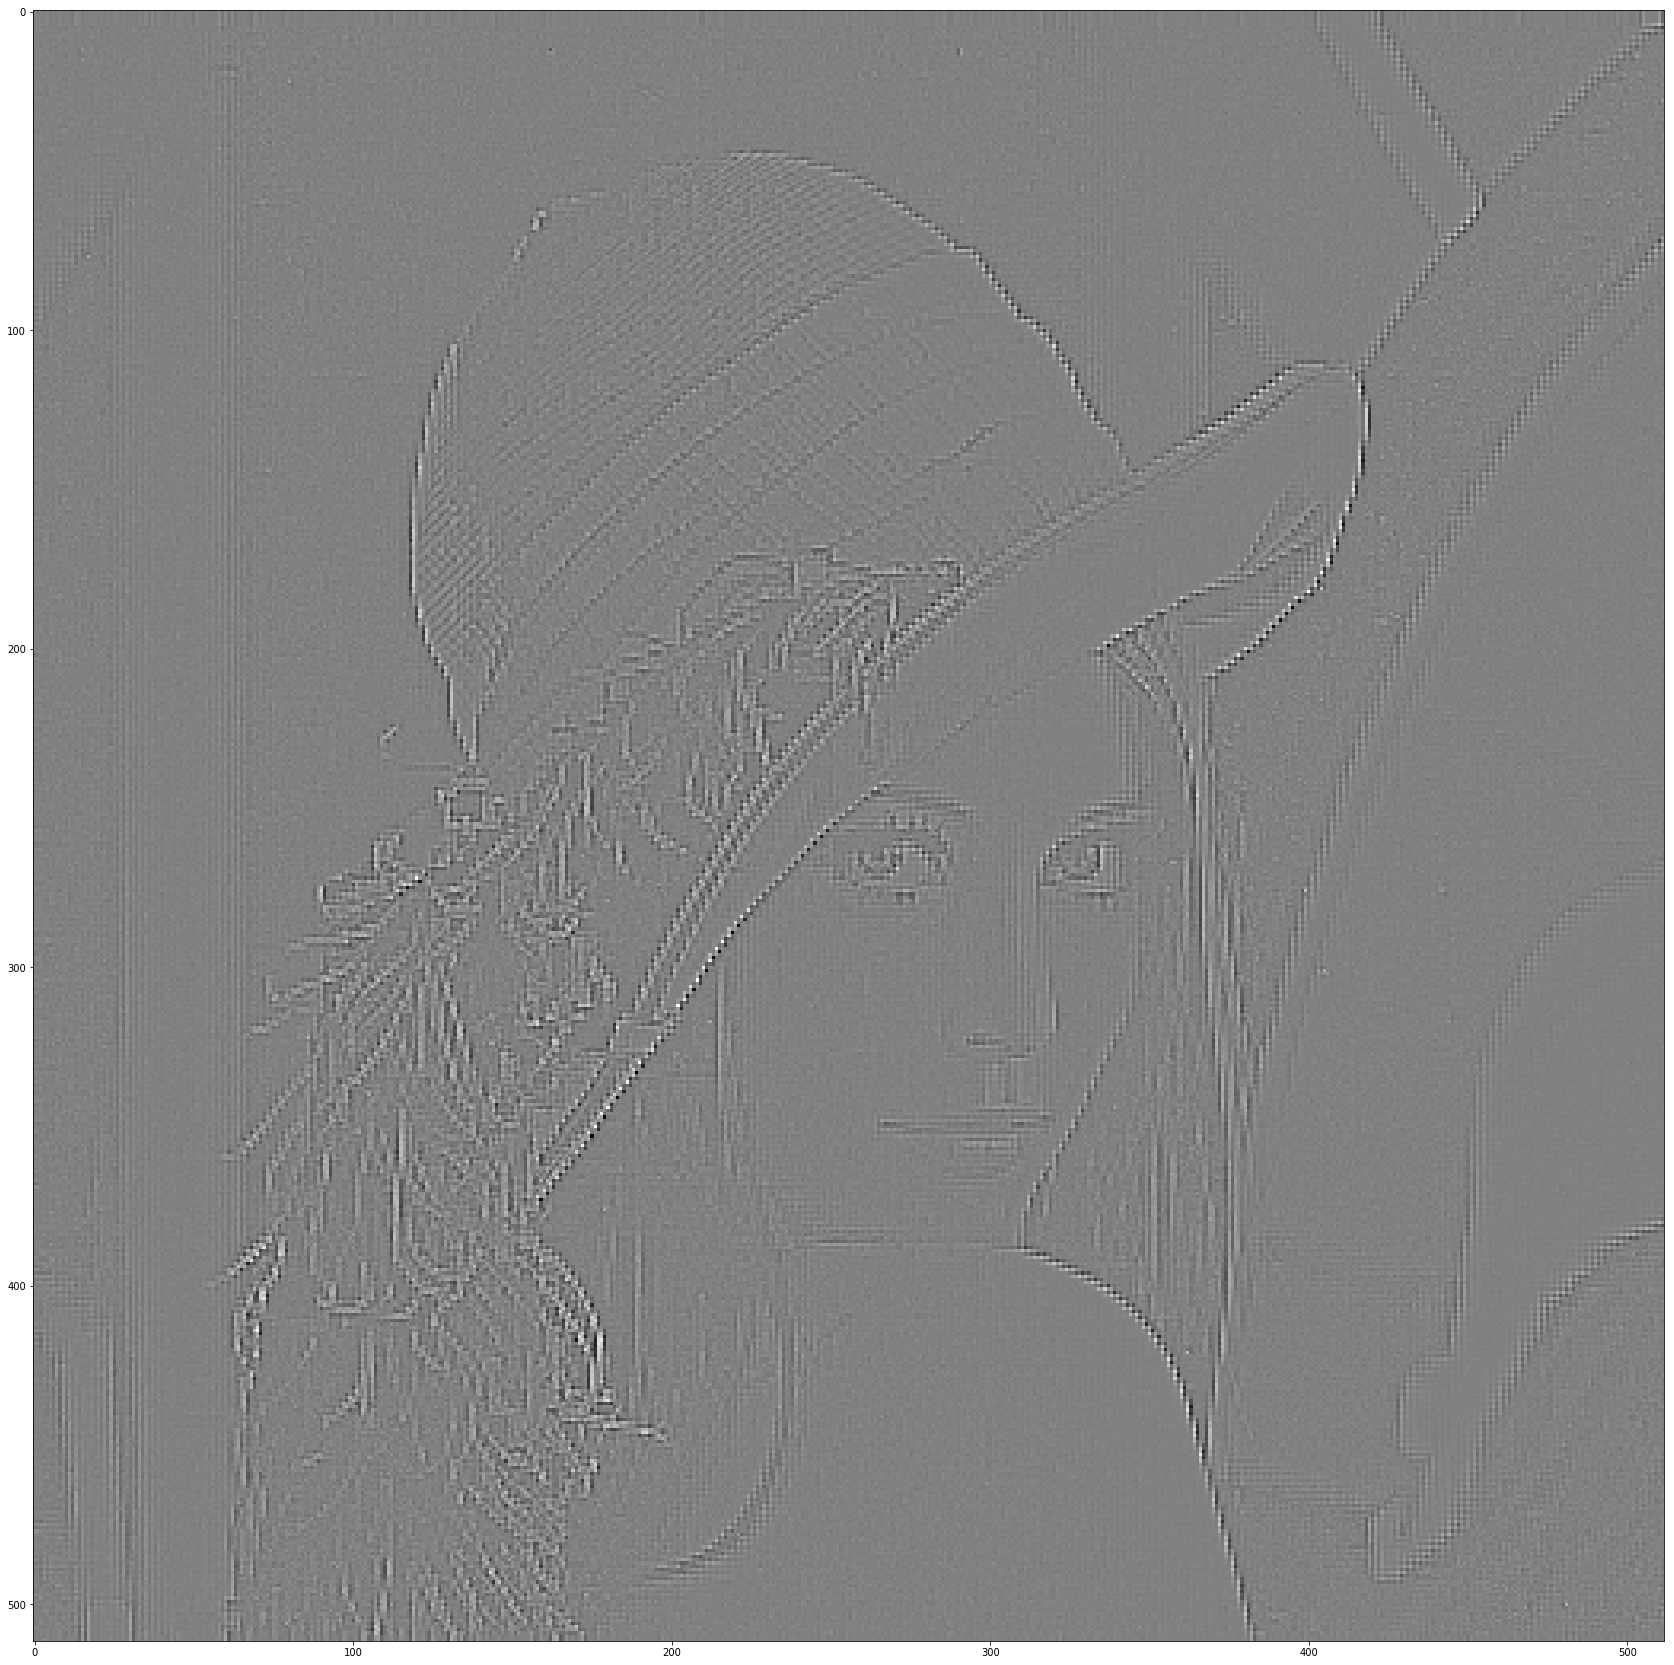

In [28]:
# Objective
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros((L.shape[0], L.shape[1]))
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
show(_H_)

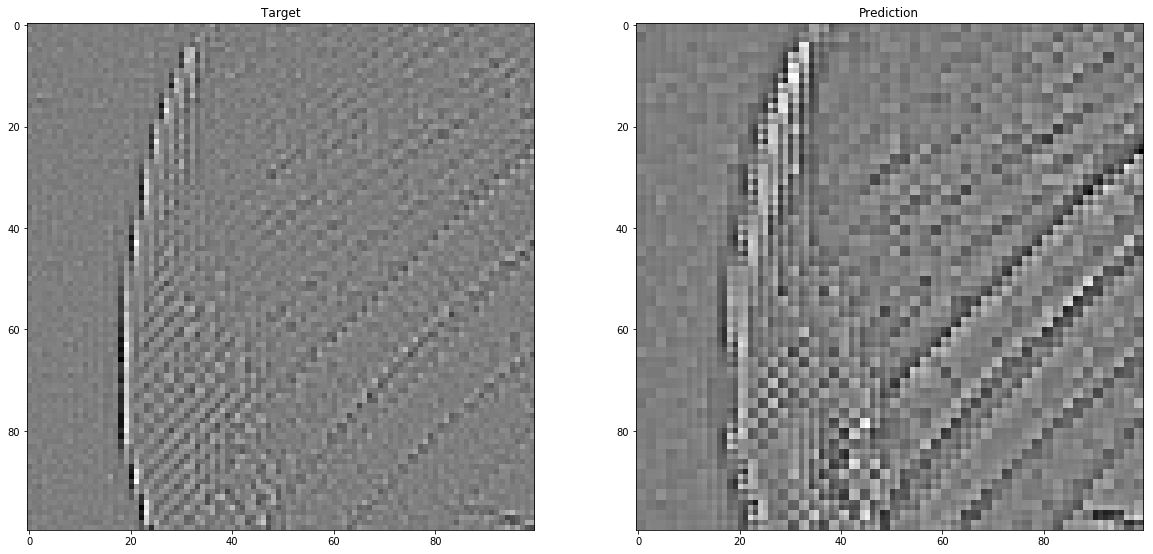

In [29]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

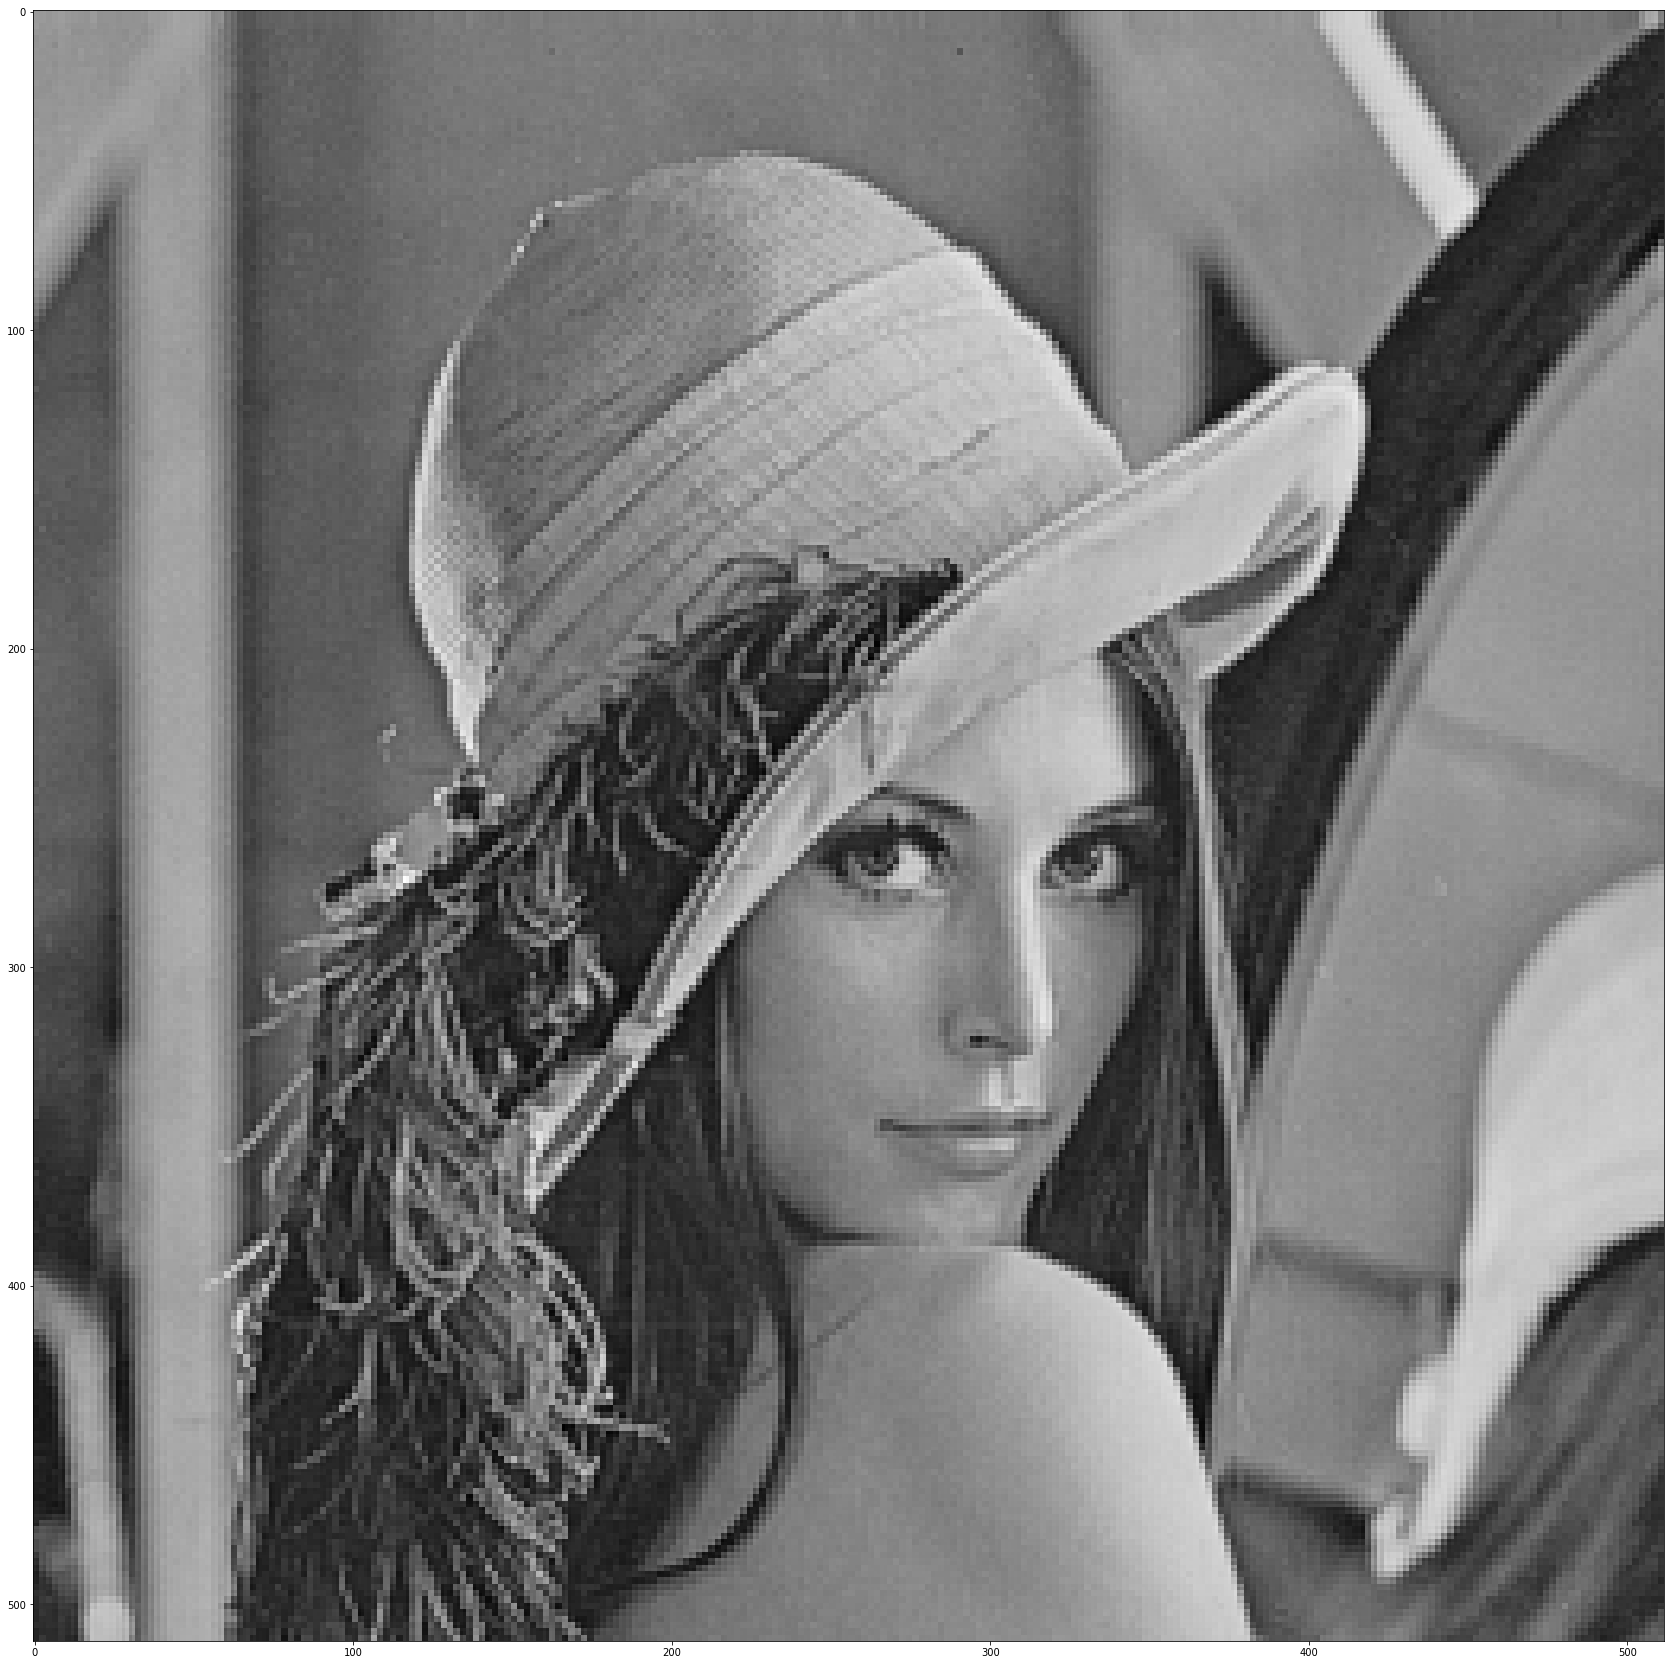

In [30]:
reconstruction_without_H = L_big + diff
show(reconstruction_without_H)

In [ ]:
tmp = L_big

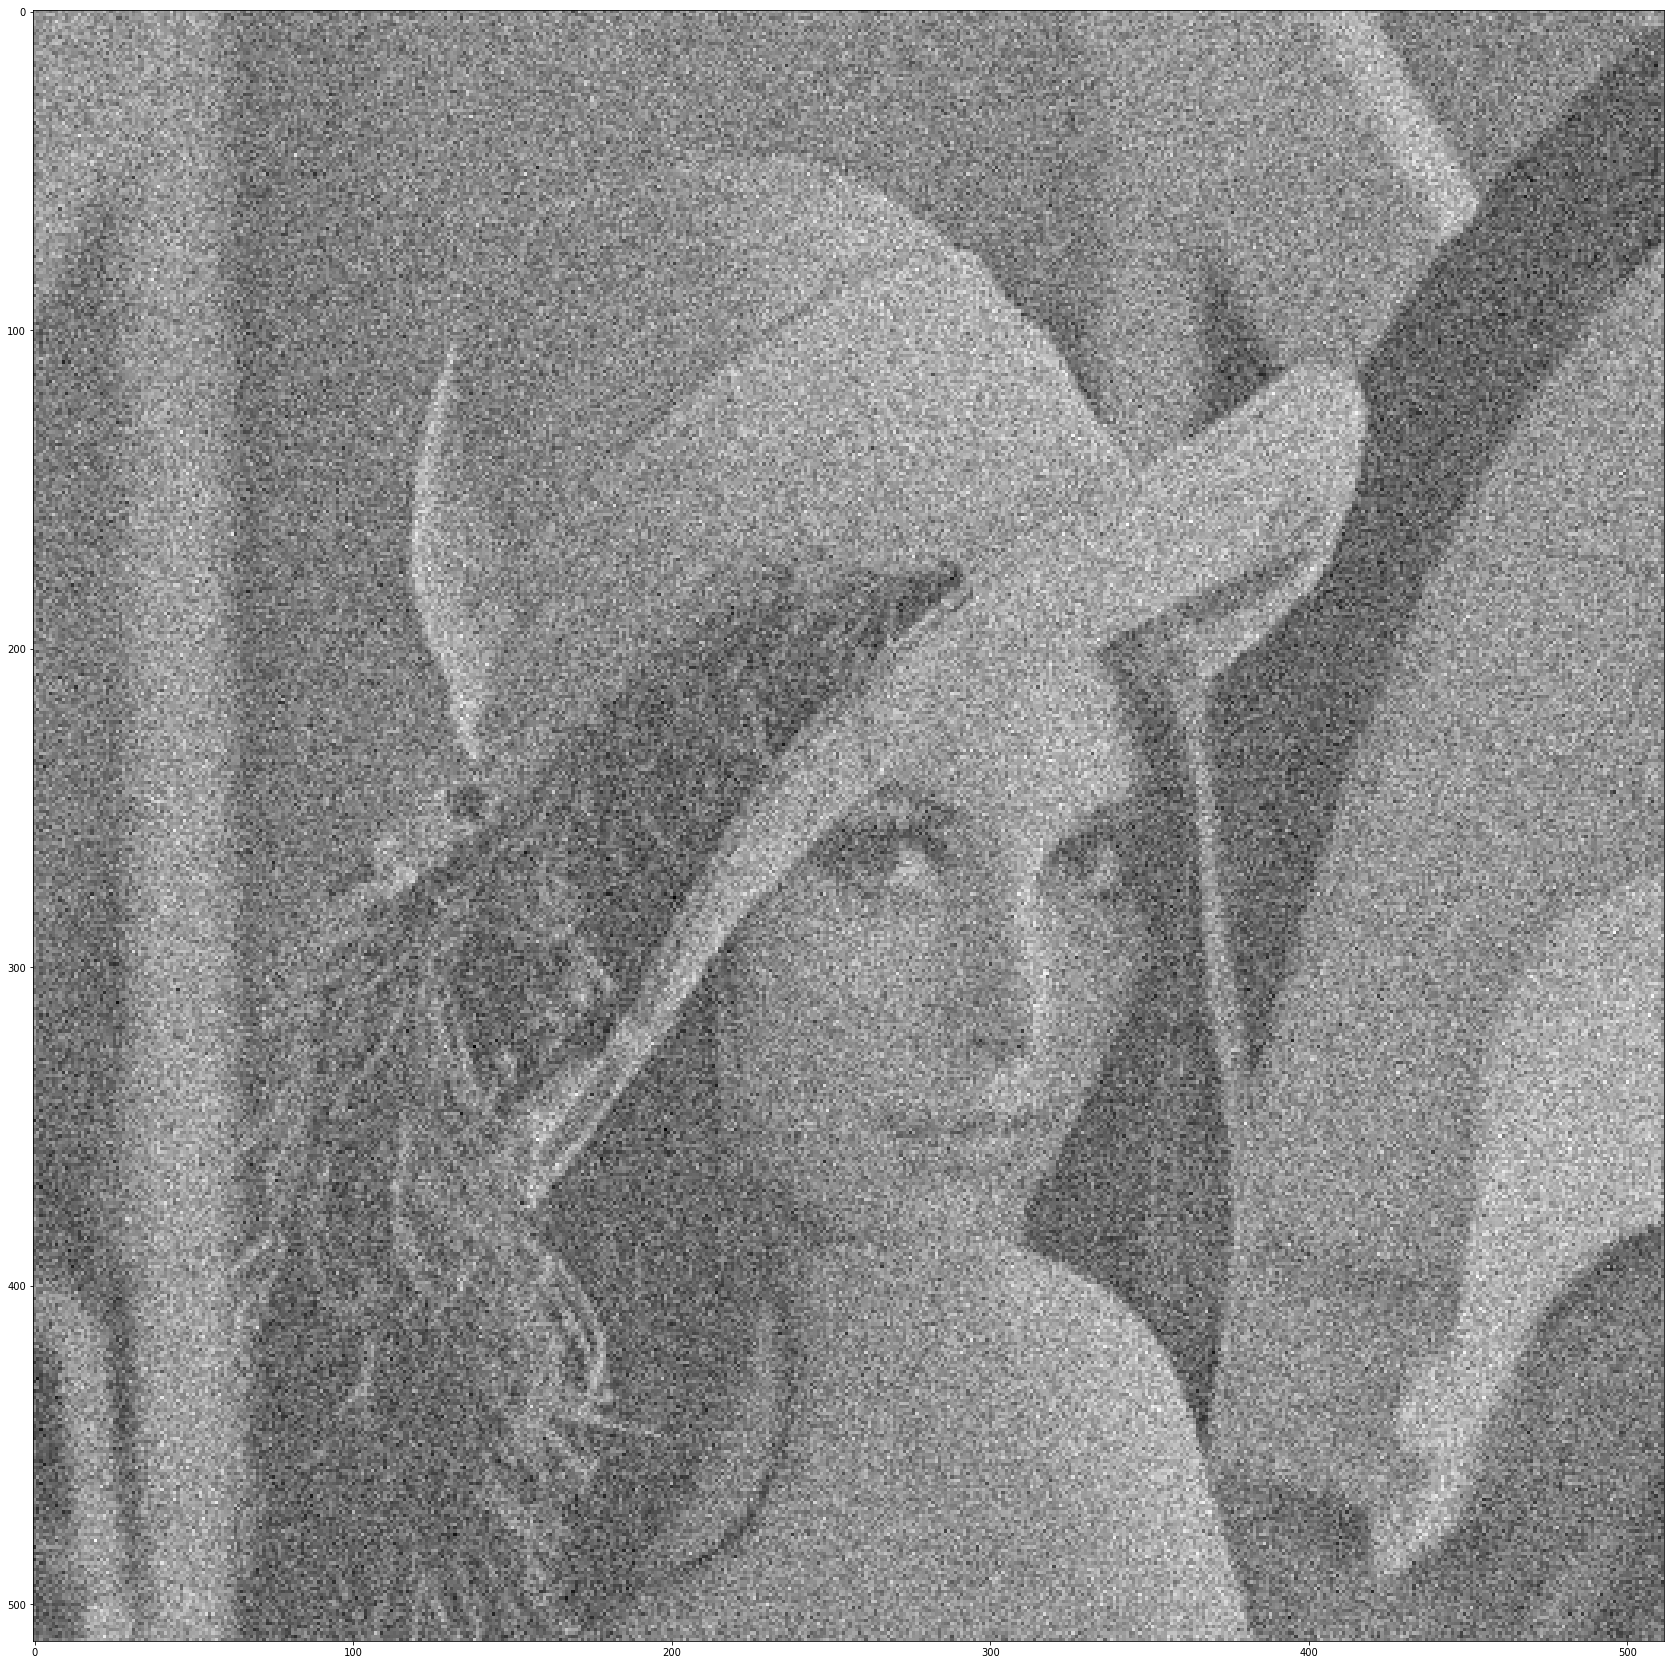

In [43]:
tmp = tmp + np.random.normal(0,1,L_big.shape)
show(tmp)

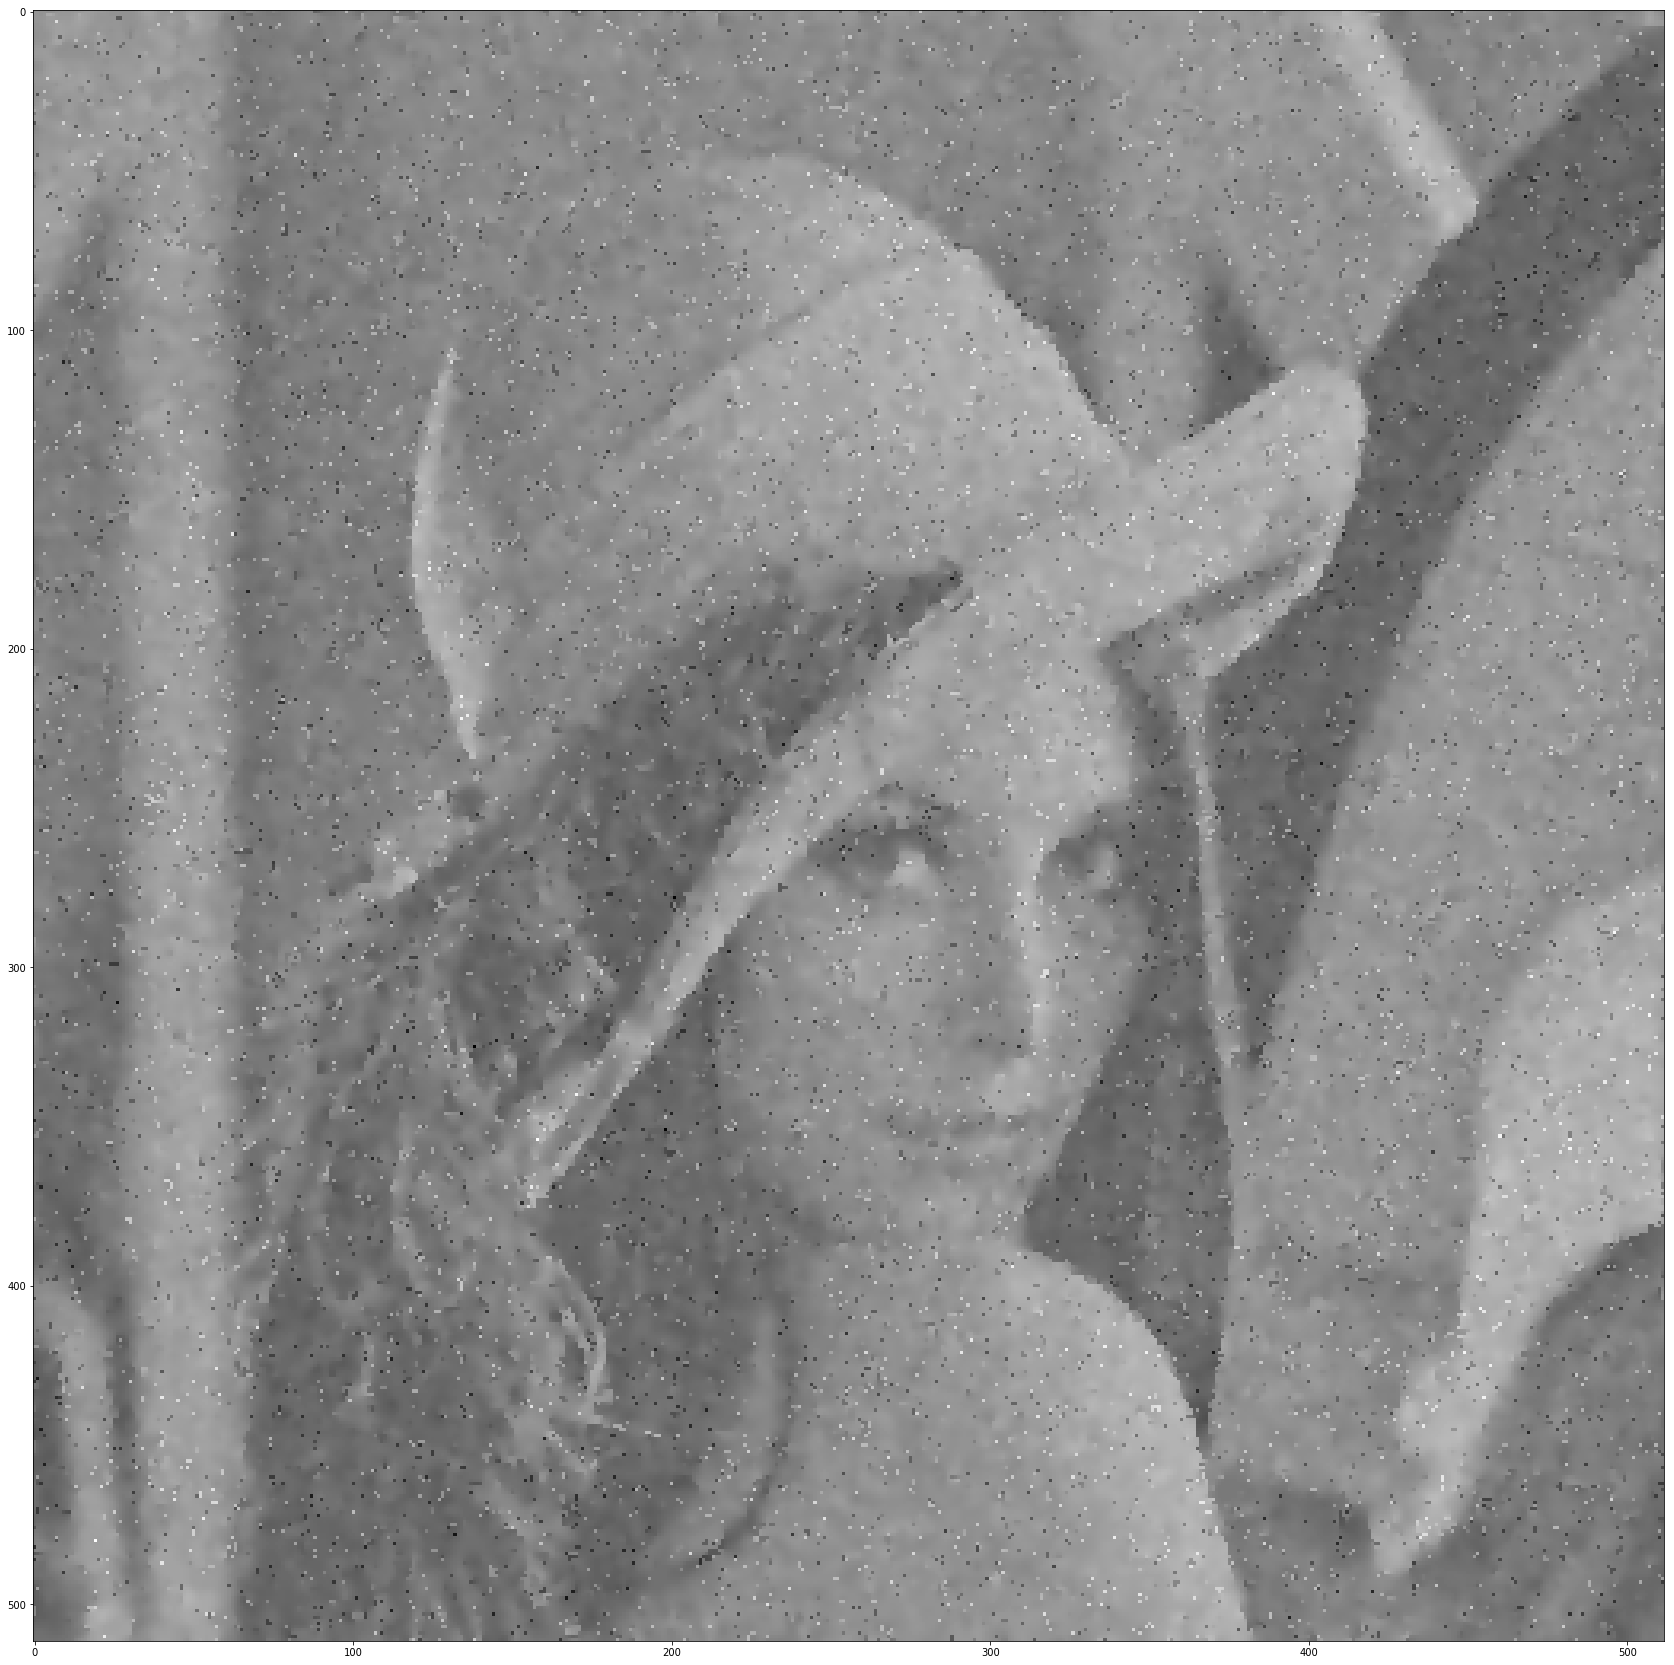

In [42]:
L_big_filtered = anisotropic_diffusion(tmp, niter=5)
show(L_big_filtered)

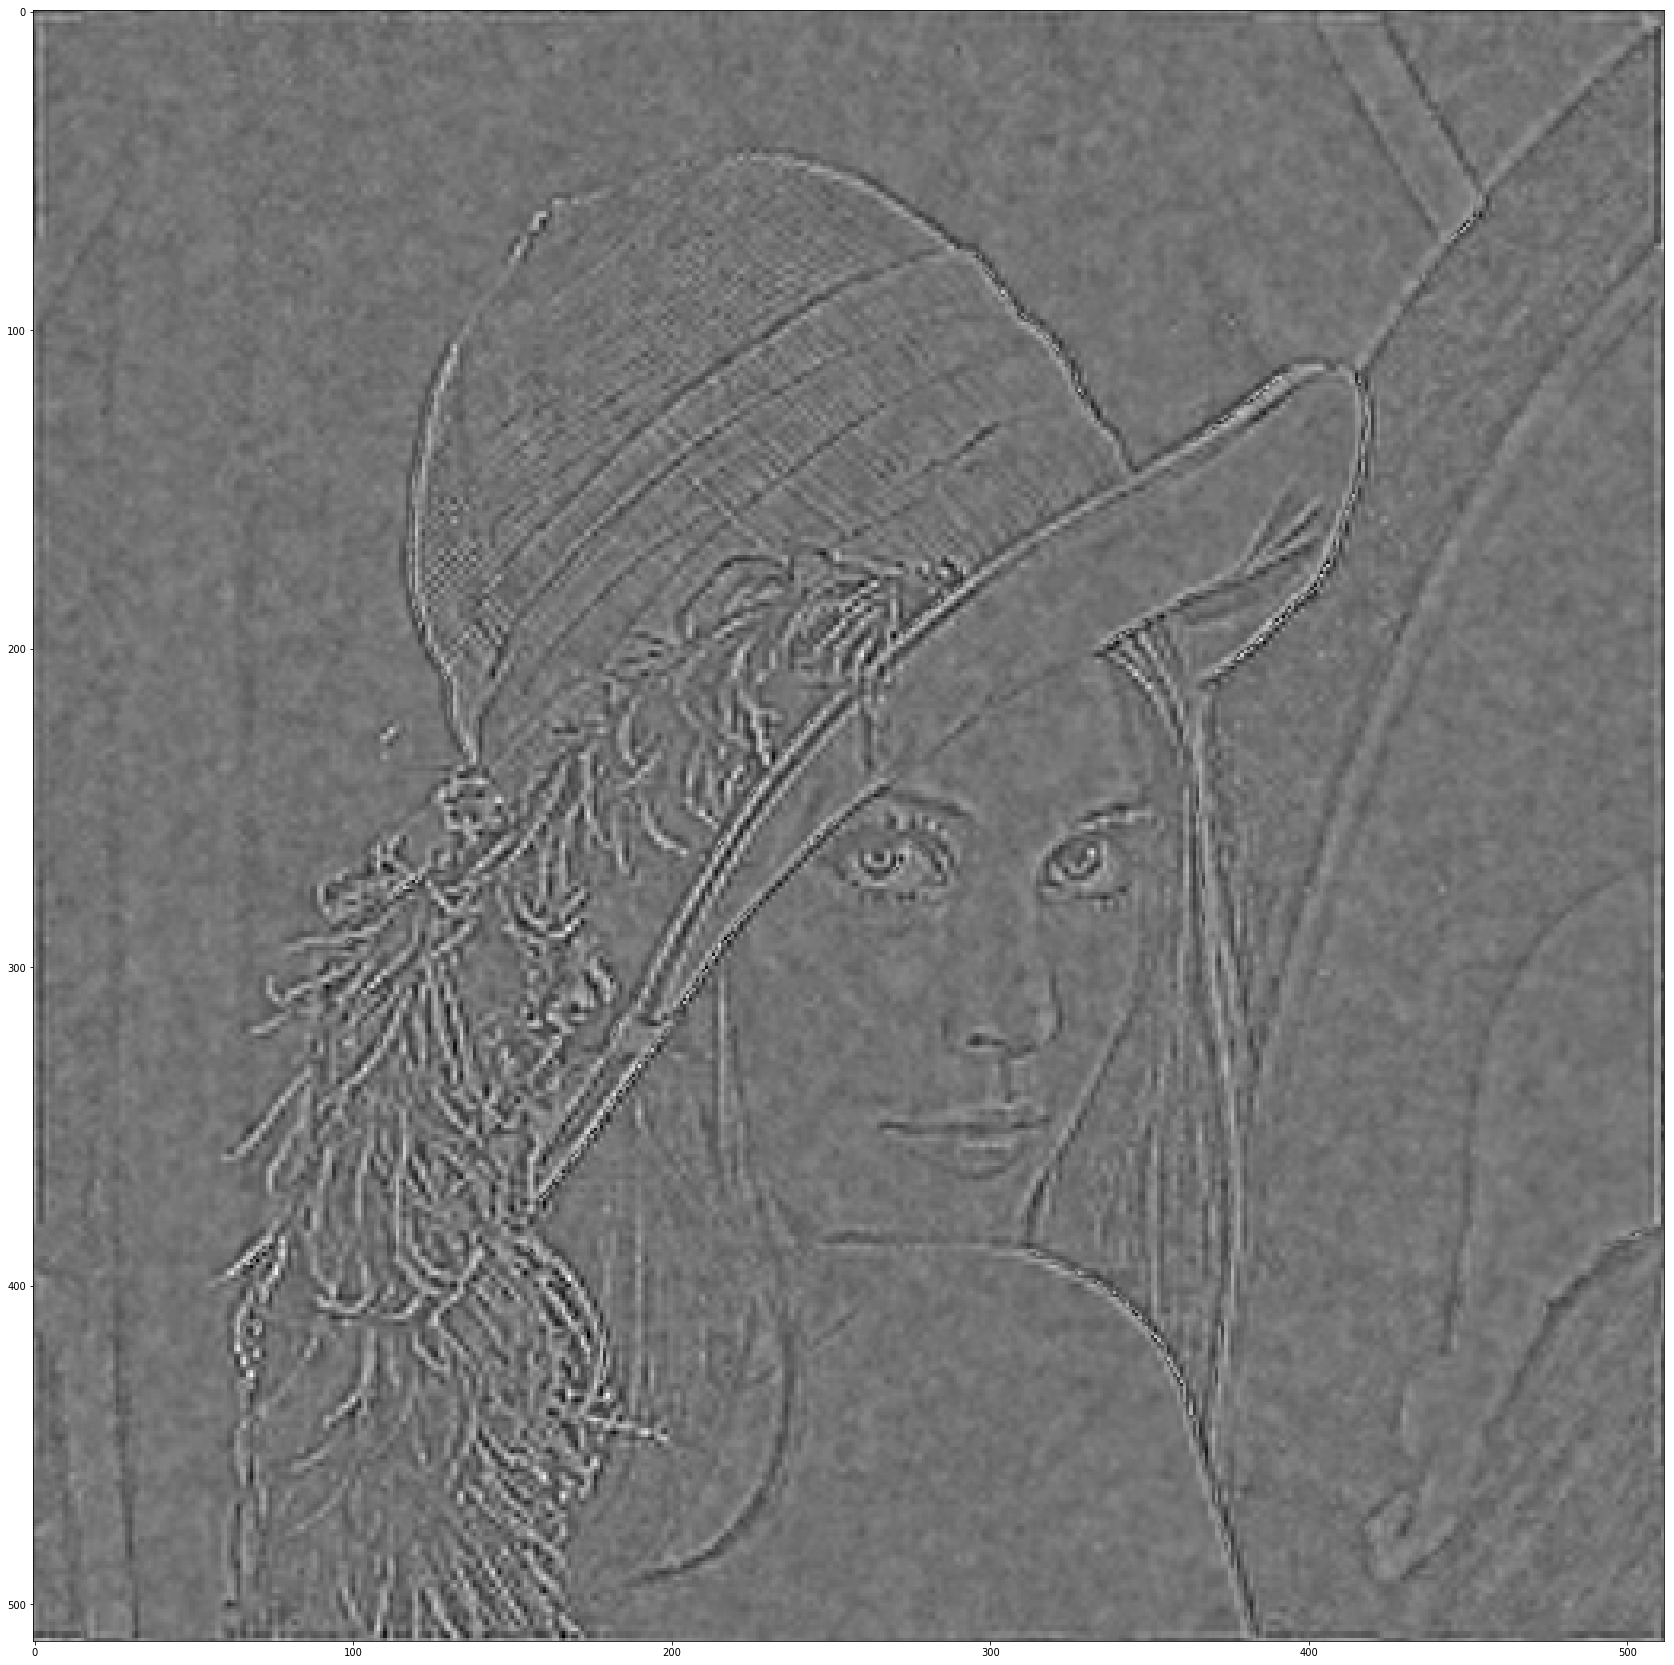

In [37]:
diff = L_big - L_big_filtered
show(diff)

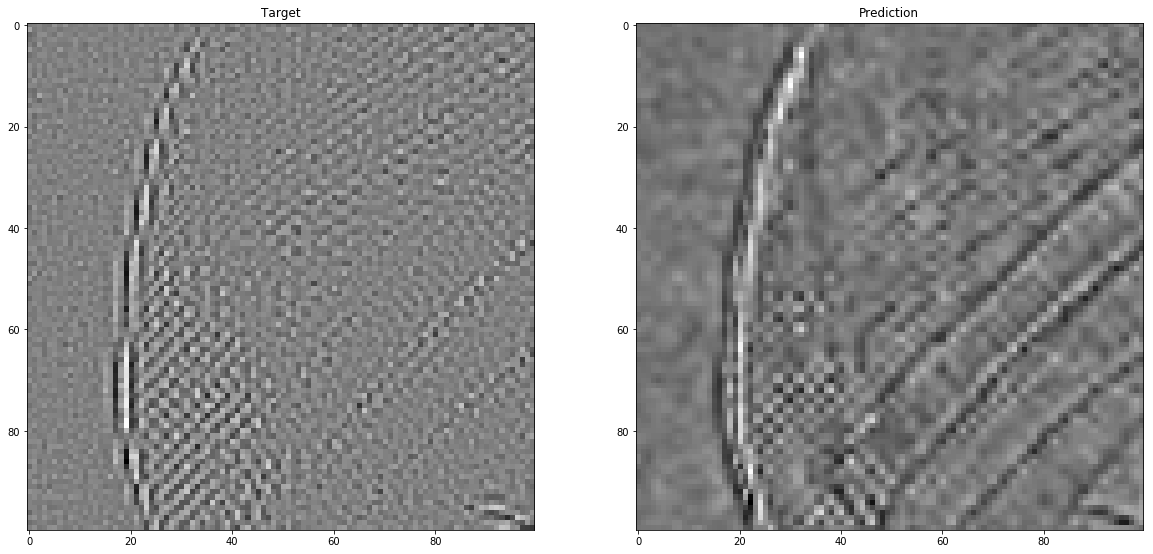

In [38]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

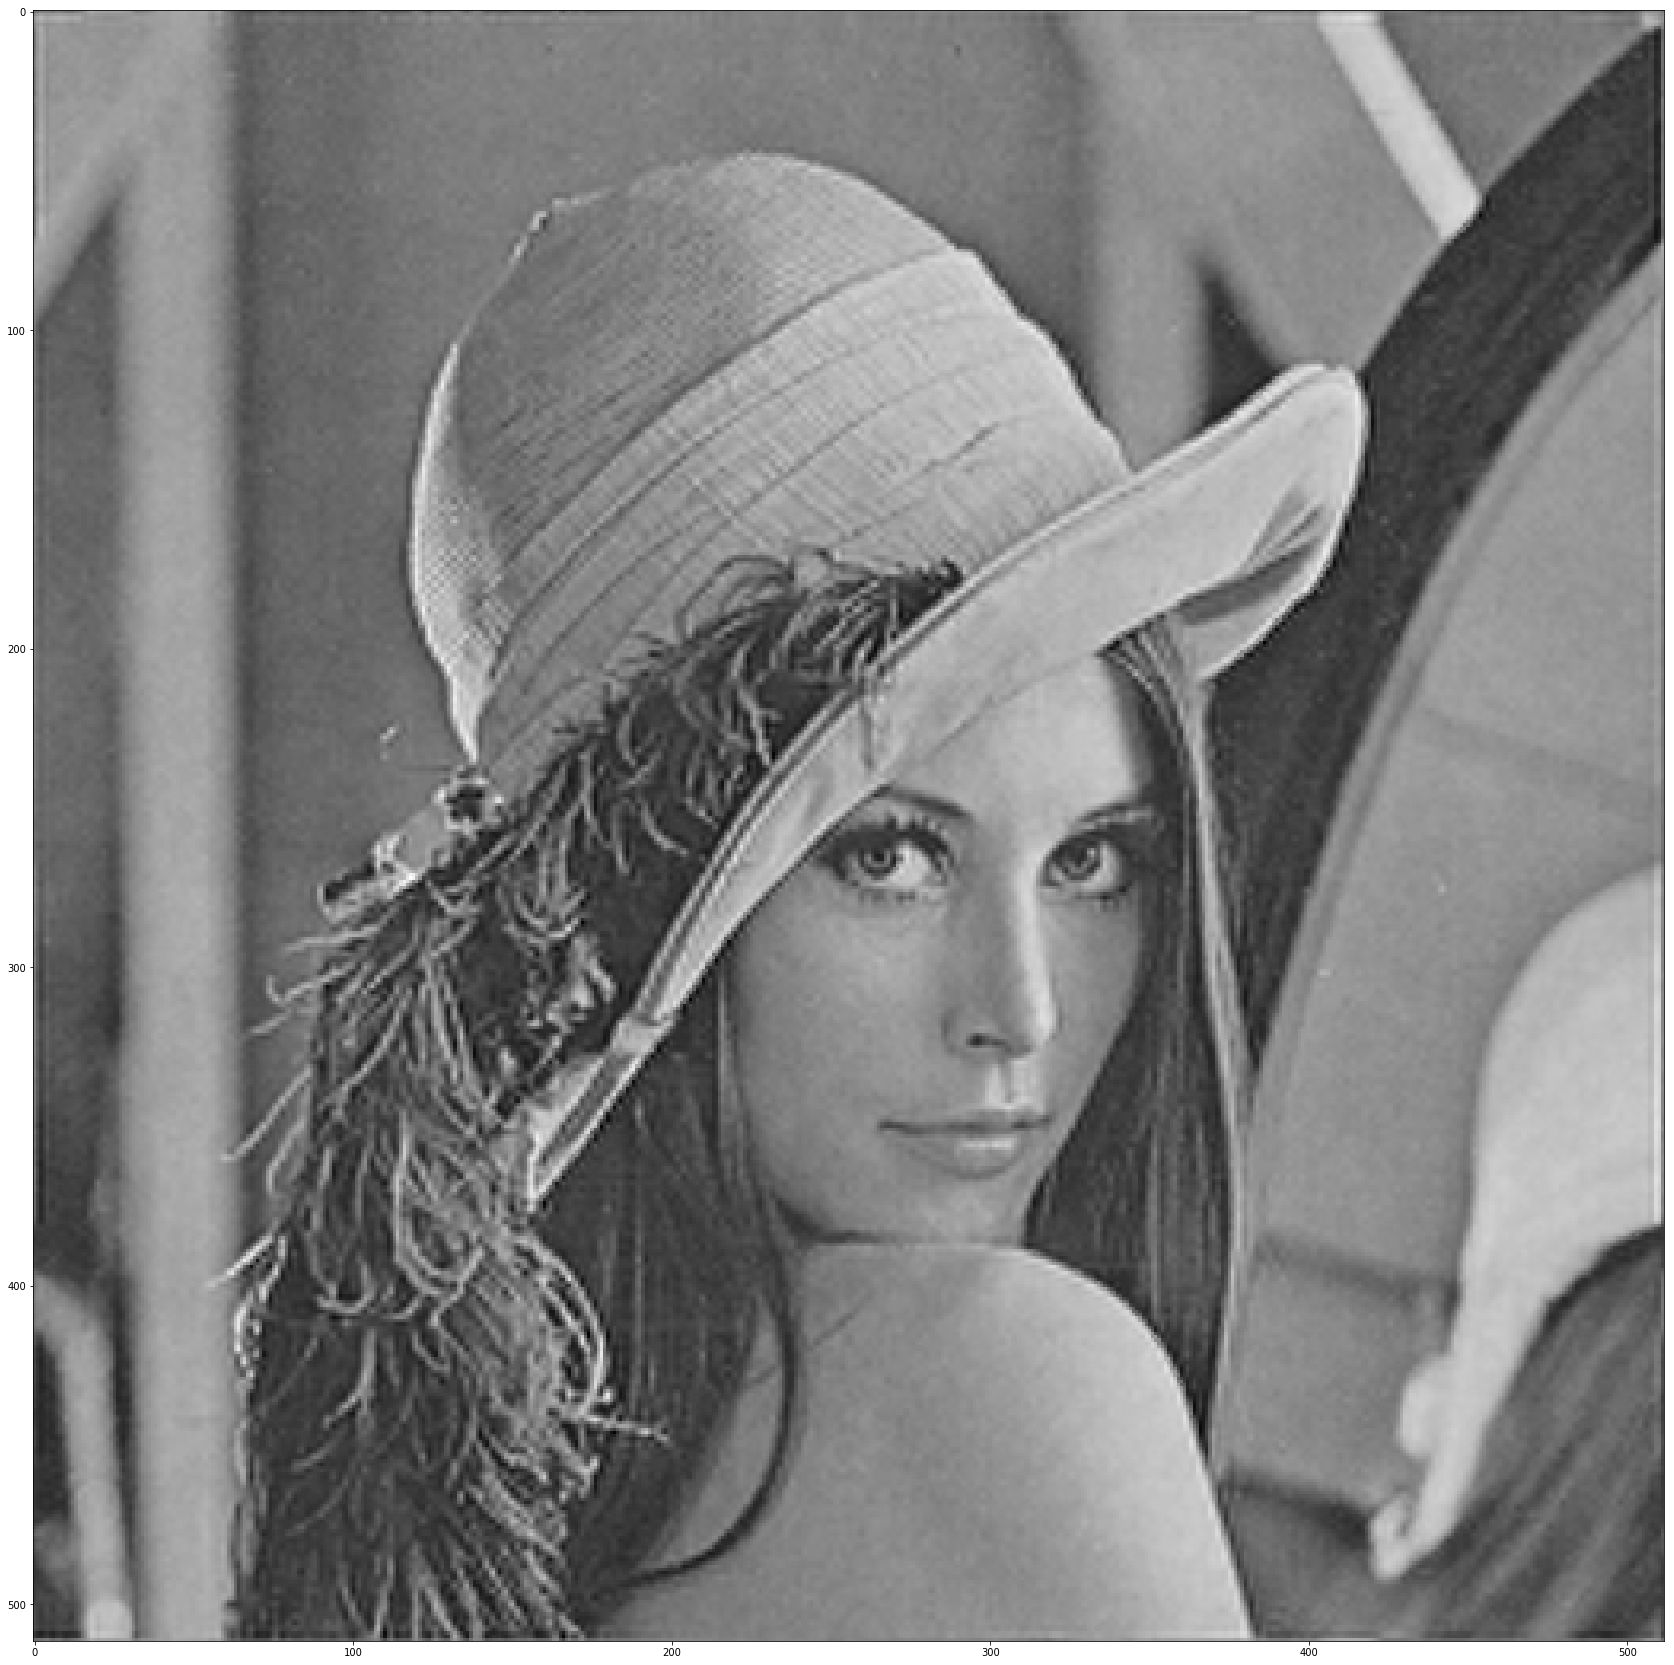

In [39]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)